# Comparing different datasets, sample level, NK-cells

- Comparisons were done using raw protein data
- focusing on NK-cells (or NK + T cells in Easigenomics dataset)

Datasets:

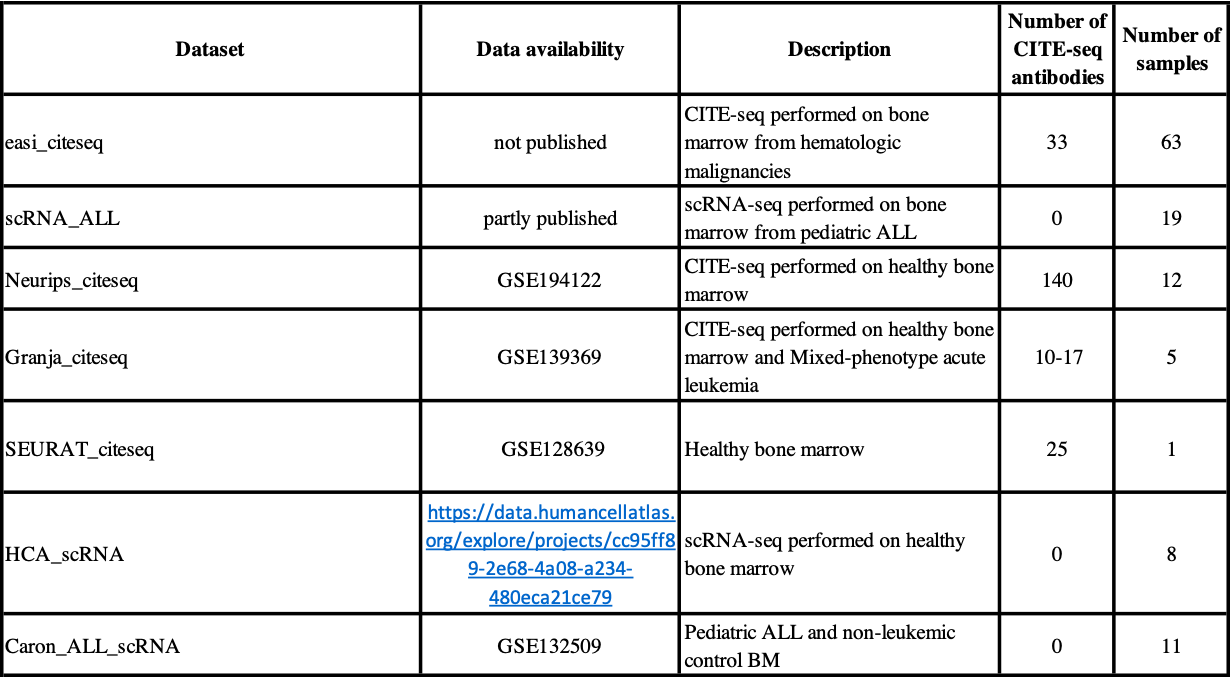

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


## Neurips 

In [3]:
#Neurips

adata_neurips = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_neurips_norm.h5ad')

In [4]:
adata_neurips.obs['DIAGNOSIS'] 

GTAGTACCAATCCTTT-1-s4d1    healthy
CTCAAGAGTCACAGAG-1-s4d1    healthy
CTGTGGGTCATGCGGC-1-s4d1    healthy
CGTGATAGTTATCTGG-1-s4d1    healthy
AGATCCAAGATCGGTG-1-s4d1    healthy
                            ...   
GTGGTTAGTCGAGTTT-1-s1d3    healthy
GCTACAACAGTGCGCT-1-s1d3    healthy
AACAAAGGTTGGTACT-1-s1d3    healthy
TGACAGTCATGGCTGC-1-s1d3    healthy
CTGGCAGGTCTCACGG-1-s1d3    healthy
Name: DIAGNOSIS, Length: 80998, dtype: category
Categories (1, object): ['healthy']

In [5]:
adata_neurips.obs['new_cell_type'].unique().tolist()

['NK', 'T', 'Prog', 'Myel', 'B', 'DC', 'E', 'Normoblast']

In [6]:
#Select only NK-cells

neurips_nk=adata_neurips[adata_neurips.obs['new_cell_type'] == 'NK' ]

In [7]:
neurips_nk

View of AnnData object with n_obs × n_vars = 7388 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    obsp: 'connectivities', 'distances'

In [8]:
neurips_nk_prot=neurips_nk.obsm['protein_expression']

In [11]:
columns_neurips= neurips_nk_prot.columns.unique().tolist()

In [ ]:
#Markers from Olli's file

#nk_immature = ['NCAM1']
#nk_activating= ['NCR1', 'KLRK1', 'CD2', 'CD226']
#nk_maturation= ['B3GAT1']
#nk_inhibitory= ['KIR2DL1', 'KIR2DL3', 'KIR3DL3']

In [13]:
nk_markers= ['CD56','CD335', 'CD314', 'CD2', 'CD226', 'CD57', 'CD158A', 'CD158B2', 'CD158E1']



In [14]:
listOfGenes=nk_markers
nk_markers=[]

for x in listOfGenes:
    if x in columns_neurips:
        print(x, "Yes")
        nk_markers.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

CD56 Yes
CD335 Yes
CD314 Yes
CD2 Yes
CD226 Yes
CD57 Yes
CD158A No
CD158B2 No
CD158E1 No
['CD56', 'CD335', 'CD314', 'CD2', 'CD226', 'CD57', 'CD158A', 'CD158B2', 'CD158E1']


In [10]:
#To exclude columns that contain only zeros

neurips_nk_prot = pd.DataFrame(neurips_nk_prot)
neurips_nk_prot != 0
(neurips_nk_prot != 0).any(axis=0)
neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]
neurips_nk_prot = neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]

for col in neurips_nk_prot:
    print(col)

CD86
CD274
CD270
CD155
CD112
CD47
CD48
CD40
CD154
CD52
CD3
CD8
CD56
CD19
CD33
CD11c
HLA-A-B-C
CD45RA
CD123
CD7
CD105
CD49f
CD194
CD4
CD44
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD20
CD335
CD31
Podoplanin
CD146
IgM
CD5
CD195
CD32
CD196
CD185
CD103
CD69
CD62L
CD161
CD152
CD223
KLRG1
CD27
CD107a
CD95
CD134
HLA-DR
CD1c
CD11b
CD64
CD141
CD1d
CD314
CD35
CD57
CD272
CD278
CD58
CD39
CX3CR1
CD24
CD21
CD11a
CD79b
CD244
CD169
integrinB7
CD268
CD42b
CD54
CD62P
CD119
TCR
CD192
CD122
FceRIa
CD41
CD137
CD163
CD83
CD124
CD13
CD2
CD226
CD29
CD303
CD49b
CD81
IgD
CD18
CD28
CD38
CD127
CD45
CD22
CD71
CD26
CD115
CD63
CD304
CD36
CD172a
CD72
CD158
CD93
CD49a
CD49d
CD73
CD9
TCRVa7.2
TCRVd2
LOX-1
CD158b
CD158e1
CD142
CD319
CD352
CD94
CD162
CD85j
CD23
CD328
HLA-E
CD82
CD101
CD88
CD224


## Granja

In [15]:
#Selecting Granja dataset

adata_granja = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_granja_norm.h5ad')

In [27]:
adata_granja.obs['DIAGNOSIS'] 

BMMC_D1T1:AAACCCAAGATGCAGC-1    healthy
BMMC_D1T1:AAACCCACAAACTCGT-1    healthy
BMMC_D1T1:AAACCCACAGTGTACT-1    healthy
BMMC_D1T1:AAACCCATCGCTATTT-1    healthy
BMMC_D1T1:AAACGAACACCCAATA-1    healthy
                                 ...   
MPAL5_T1:TTTGTCAAGCGTGAGT-1        MPAL
MPAL5_T1:TTTGTCACACGTCAGC-1        MPAL
MPAL5_T1:TTTGTCACATCGTCGG-1        MPAL
MPAL5_T1:TTTGTCACATTTCACT-1        MPAL
MPAL5_T1:TTTGTCATCGTAGGAG-1        MPAL
Name: DIAGNOSIS, Length: 24204, dtype: category
Categories (2, object): ['MPAL', 'healthy']

In [28]:
adata_granja.obs['new_cell_type'].unique()

['T', 'Myel', 'B', 'DC', 'NK', 'E', 'Prog', 'Stromal', 'Megakaryocyte', NaN]
Categories (9, object): ['B', 'DC', 'E', 'Megakaryocyte', ..., 'NK', 'Prog', 'Stromal', 'T']

In [29]:
#Select NK-cells
granja_nk=adata_granja[adata_granja.obs['new_cell_type'] == 'NK' ]

In [30]:
granja_nk

View of AnnData object with n_obs × n_vars = 1033 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_granja'
    obsp: 'connectivities', 'distances'

In [31]:
granja_nk_prot=granja_nk.obsm['protein_expression_clr_granja']


CD86  CD274  CD270  CD155  CD112  CD47  CD48  \
BMMC_D1T1:AAAGAACTCGAAGAAT-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T1:AAAGGGCAGAAGTGTT-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T1:AAAGTCCGTCGGAAAC-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T1:AAAGTGAGTTACCCAA-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T1:AACAAAGAGTCTGCGC-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
...                            ...    ...    ...    ...    ...   ...   ...   
BMMC_D1T2:TTTACTGGTCAGGAGT-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T2:TTTCACACAACGCATT-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T2:TTTCAGTTCCAACACA-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T2:TTTCAGTTCTCGGCTT-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T2:TTTGACTGTAGTATAG-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   

                              CD40  CD154  CD52  ...  CD101  CD88  CD224  \
BMMC_D1T1:AAAGAACTCGAAGAAT-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T1:AAAGGGCAGAAGTGTT-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T1:AAAGTCCGTCGGAAAC-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T1:AAAGTGAGTTACCCAA-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T1:AACAAAGAGTCTGCGC-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
...                            ...    ...   ...  ...    ...   ...    ...   
BMMC_D1T2:TTTACTGGTCAGGAGT-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T2:TTTCACACAACGCATT-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T2:TTTCAGTTCCAACACA-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T2:TTTCAGTTCTCGGCTT-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T2:TTTGACTGTAGTATAG-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   

                              CD197  CD34  CD10  CD90      CD15  CD117  \
BMMC_D1T1:AAAGAACTCGAAGAAT-1    0.0   0.0   0.0   0.0  2.346739    0.0   
BMMC_D1T1:AAAGGGCAGAAGTGTT-1    0.0   0.0   0.0   0.0  1.927923    0.0   
BMMC_D1T1:AAAGTCCGTCGGAAAC-1    0.0   0.0   0.0   0.0  1.890060    0.0   
BMMC_D1T1:AAAGTGAGTTACCCAA-1    0.0   0.0   0.0   0.0  2.346739    0.0   
BMMC_D1T1:AACAAAGAGTCTGCGC-1    0.0   0.0   0.0   0.0  2.016744    0.0   
...                             ...   ...   ...   ...       ...    ...   
BMMC_D1T2:TTTACTGGTCAGGAGT-1    0.0   0.0   0.0   0.0  1.830436    0.0   
BMMC_D1T2:TTTCACACAACGCATT-1    0.0   0.0   0.0   0.0  2.144246    0.0   
BMMC_D1T2:TTTCAGTTCCAACACA-1    0.0   0.0   0.0   0.0  1.744967    0.0   
BMMC_D1T2:TTTCAGTTCTCGGCTT-1    0.0   0.0   0.0   0.0  1.809744    0.0   
BMMC_D1T2:TTTGACTGTAGTATAG-1    0.0   0.0   0.0   0.0  1.722408    0.0   

                              CD66ace  
BMMC_D1T1:AAAGAACTCGAAGAAT-1      0.0  
BMMC_D1T1:AAAGGGCAGAAGTGTT-1      0.0  
BMMC_D1T1:AAAGTCCGTCGGAAAC-1      0.0  
BMMC_D1T1:AAAGTGAGTTACCCAA-1      0.0  
BMMC_D1T1:AACAAAGAGTCTGCGC-1      0.0  
...                               ...  
BMMC_D1T2:TTTACTGGTCAGGAGT-1      0.0  
BMMC_D1T2:TTTCACACAACGCATT-1      0.0  
BMMC_D1T2:TTTCAGTTCCAACACA-1      0.0  
BMMC_D1T2:TTTCAGTTCTCGGCTT-1      0.0  
BMMC_D1T2:TTTGACTGTAGTATAG-1      0.0  

[1033 rows x 141 columns]

In [32]:
#To exclude columns that contain only zeros

granja_nk_prot = pd.DataFrame(granja_nk_prot)
granja_nk_prot != 0
(granja_nk_prot != 0).any(axis=0)
granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]
granja_nk_prot = granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]

for col in granja_nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD45RA
CD4
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD127
CD15


## Easigenomics

In [33]:
#Selecting Easigenomic dataset

adata_easi = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')

In [34]:
adata_easi.obs['DIAGNOSIS'] 

AAACCTGAGCCCTAAT-1-100    Aplastic anemia
AAACCTGCAAGCCGCT-1-100    Aplastic anemia
AAACCTGCACTGTCGG-1-100    Aplastic anemia
AAACCTGCAGACGCTC-1-100    Aplastic anemia
AAACCTGTCCTTAATC-1-100    Aplastic anemia
                               ...       
TTTGTCAGTACATCCA-1-158              B-ALL
TTTGTCAGTAGGCATG-1-158              B-ALL
TTTGTCAGTATGCTTG-1-158              B-ALL
TTTGTCATCAAACCAC-1-158              B-ALL
TTTGTCATCCATGAAC-1-158              B-ALL
Name: DIAGNOSIS, Length: 121340, dtype: category
Categories (10, object): ['AML', 'Aplastic anemia', 'B-ALL', 'Blastic plasmacytoid dendritic cell leukemia', ..., 'Multiple myeloma', 'Plasma cell leukemia', 'RAEB-2', 'T-ALL']

In [35]:
adata_easi.obs['new_cell_type'].unique()

['NK', 'non-leukemic', 'preleukemic', 'non-leukemic?', NaN, ..., 'leukemic?', 'doublets?', 'unknown', '0', 'preleukemic?']
Length: 11
Categories (10, object): ['0', 'NK', 'doublets?', 'leukemic', ..., 'non-leukemic?', 'preleukemic', 'preleukemic?', 'unknown']

In [38]:
#Select NK + T

easi_nkt=adata_easi[adata_easi.obs['cell_type'] == 'NKT' ]

In [39]:
easi_nkt

View of AnnData object with n_obs × n_vars = 27738 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [40]:
easi_nkt_prot=easi_nkt.obsm['protein_expression_clr']

CD19      CD10      CD20       CD3       CD2  \
AAACCTGAGCCCTAAT-1-100  0.478646  0.589328  0.507486  0.418344  1.800515   
AAACCTGCAGACGCTC-1-100  0.332147  0.357515  0.694546  0.540162  1.879650   
AAACCTGTCCTTAATC-1-100  0.363054  0.530829  0.530829  0.363054  1.853775   
AAACGGGGTCTCTCGT-1-100  0.345256  0.537805  0.469869  0.699197  2.790828   
AAAGATGTCCAGTAGT-1-100  0.318489  0.283800  0.171871  0.611861  2.949483   
...                          ...       ...       ...       ...       ...   
TTAGGCACAGAAGCAC-1-158  0.340343  2.252768  0.449547  1.323601  1.740991   
TTCTACAGTGAGCGAT-1-158  0.573392  1.834990  0.805958  1.371751  2.396818   
TTGAACGAGCGGATCA-1-158  0.805655  1.364387  1.010871  0.984009  3.220271   
TTGCCGTAGATCCGAG-1-158  0.684616  2.130814  0.552307  1.000730  3.025827   
TTTGCGCTCTGTCTCG-1-158  0.474143  1.415816  0.359988  0.159842  3.132254   

                           CD11b     HLADR      CD38     CD11c       CD7  ...  \
AAACCTGAGCCCTAAT-1-100  0.735300  0.821979  0.386772  0.779578  1.667181  ...   
AAACCTGCAGACGCTC-1-100  0.600883  0.888949  0.453003  0.694546  2.364060  ...   
AAACCTGTCCTTAATC-1-100  0.651907  0.800025  0.332136  0.857352  1.225956  ...   
AAACGGGGTCTCTCGT-1-100  0.580660  0.735780  0.290712  0.559462  1.266690  ...   
AAAGATGTCCAGTAGT-1-100  0.878145  0.817923  0.352015  0.636968  0.731533  ...   
...                          ...       ...       ...       ...       ...  ...   
TTAGGCACAGAAGCAC-1-158  0.719847  0.831768  0.150291  0.963831  1.501118  ...   
TTCTACAGTGAGCGAT-1-158  0.696421  0.734282  0.074576  0.381558  1.659849  ...   
TTGAACGAGCGGATCA-1-158  0.547156  0.588433  0.310543  0.504102  0.628074  ...   
TTGCCGTAGATCCGAG-1-158  0.366277  0.844607  0.219740  0.399785  2.272088  ...   
TTTGCGCTCTGTCTCG-1-158  1.005491  0.624132  0.712925  1.231554  2.456120  ...   

                             CD5      CD15      CD64     CD117      CD24  \
AAACCTGAGCCCTAAT-1-100  0.507486  1.108744  0.640390  0.418344  0.285596   
AAACCTGCAGACGCTC-1-100  1.135601  1.039049  0.164727  0.406398  0.382255   
AAACCTGTCCTTAATC-1-100  1.088464  0.838606  0.422162  0.363054  0.267275   
AAACGGGGTCTCTCGT-1-100  1.055818  0.960086  0.345256  0.233019  0.371452   
AAAGATGTCCAGTAGT-1-100  0.775660  1.164216  0.318489  0.504607  0.247864   
...                          ...       ...       ...       ...       ...   
TTAGGCACAGAAGCAC-1-158  0.449547  0.547991  0.150291  0.280917  0.449547   
TTCTACAGTGAGCGAT-1-158  1.022751  0.433076  0.327242  0.074576  0.143975   
TTGAACGAGCGGATCA-1-158  1.306933  0.362557  0.547156  0.070303  0.070303   
TTGCCGTAGATCCGAG-1-158  0.659517  0.432208  0.552307  0.179486  0.179486   
TTTGCGCTCTGTCTCG-1-158  0.159842  0.576592  0.418694  0.083111  0.418694   

                            CD44      CD58   CD66ace      CD13      CD34  
AAACCTGAGCCCTAAT-1-100  2.054122  0.589328  0.779578  0.285596  0.779578  
AAACCTGCAGACGCTC-1-100  2.121294  0.429972  0.560815  0.194650  0.796464  
AAACCTGTCCTTAATC-1-100  2.193482  0.696512  0.556246  0.123380  0.780162  
AAACGGGGTCTCTCGT-1-100  3.018252  0.345256  0.661225  0.139715  0.580660  
AAAGATGTCCAGTAGT-1-100  3.084753  0.611861  0.532518  0.247864  0.708717  
...                          ...       ...       ...       ...       ...  
TTAGGCACAGAAGCAC-1-158  2.589648  0.340343  0.280917  0.077966  0.795835  
TTCTACAGTGAGCGAT-1-158  3.181108  0.657069  0.433076  0.000000  0.616106  
TTGAACGAGCGGATCA-1-158  3.536822  0.135986  0.504102  0.135986  0.547156  
TTGCCGTAGATCCGAG-1-158  3.592897  0.295690  0.331606  0.179486  0.756338  
TTTGCGCTCTGTCTCG-1-158  2.071031  0.869869  0.159842  0.159842  0.712925  

[27738 rows x 33 columns]

In [41]:
#To exclude columns that contain only zeros

easi_nkt_prot = pd.DataFrame(easi_nkt_prot)
easi_nkt_prot != 0
(easi_nkt_prot != 0).any(axis=0)
easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]
easi_nkt_prot = easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]

for col in easi_nkt_prot:
    print(col)

CD19
CD10
CD20
CD3
CD2
CD11b
HLADR
CD38
CD11c
CD7
CD45
CD33
CD81
CD73
CD123
CD14
CD45RA
CD45RO
CD4
CD8a
CD197
CD127
CD56
CD5
CD15
CD64
CD117
CD24
CD44
CD58
CD66ace
CD13
CD34


### Seurat 

In [42]:
#Seurat

adata_seurat = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_seurat_norm.h5ad')

In [44]:
adata_seurat.obs['cell_type'].unique().tolist()

['Prog_RBC',
 'gdT',
 'CD4 Naive',
 'CD4 Memory',
 'CD14 Mono',
 'Naive B',
 'CD8 Naive',
 'Treg',
 'CD8 Effector_2',
 'NK',
 'GMP',
 'CD8 Effector_1',
 'CD16 Mono',
 'pDC',
 'CD8 Memory_1',
 'MAIT',
 'Memory B',
 'cDC2',
 'CD56 bright NK',
 'Prog_B 2',
 'Prog_Mk',
 'CD8 Memory_2',
 'Plasmablast',
 'HSC',
 'LMPP',
 'Prog_DC',
 'Prog_B 1']

In [45]:
#Select NK-cells

seurat_nk=adata_seurat[adata_seurat.obs['new_cell_type'] == 'NK' ]

In [46]:
seurat_nk

View of AnnData object with n_obs × n_vars = 1355 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_seurat'
    obsp: 'connectivities', 'distances'

In [47]:
seurat_nk_prot=seurat_nk.obsm['protein_expression_clr_seurat']


CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
a_AAACCTGTCTAACGGT-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
a_AAACGGGGTTCGGCAC-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
a_AAAGCAAAGACCTAGG-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
a_AAAGCAAAGCGTCAAG-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
a_AAAGCAACAATGTTGC-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
...                    ...    ...    ...    ...    ...   ...   ...   ...   
b_TTTATGCTCAACACAC-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
b_TTTCCTCAGATCCCGC-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
b_TTTCCTCAGTACATGA-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
b_TTTGCGCGTGGTCTCG-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
b_TTTGGTTTCGAGAGCA-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   

                      CD154  CD52  ...  CD101  CD88  CD224     CD197  \
a_AAACCTGTCTAACGGT-1    0.0   0.0  ...    0.0   0.0    0.0  0.575796   
a_AAACGGGGTTCGGCAC-1    0.0   0.0  ...    0.0   0.0    0.0  0.249285   
a_AAAGCAAAGACCTAGG-1    0.0   0.0  ...    0.0   0.0    0.0  0.402419   
a_AAAGCAAAGCGTCAAG-1    0.0   0.0  ...    0.0   0.0    0.0  0.938870   
a_AAAGCAACAATGTTGC-1    0.0   0.0  ...    0.0   0.0    0.0  0.614819   
...                     ...   ...  ...    ...   ...    ...       ...   
b_TTTATGCTCAACACAC-1    0.0   0.0  ...    0.0   0.0    0.0  0.614819   
b_TTTCCTCAGATCCCGC-1    0.0   0.0  ...    0.0   0.0    0.0  0.192545   
b_TTTCCTCAGTACATGA-1    0.0   0.0  ...    0.0   0.0    0.0  0.575796   
b_TTTGCGCGTGGTCTCG-1    0.0   0.0  ...    0.0   0.0    0.0  0.302978   
b_TTTGGTTTCGAGAGCA-1    0.0   0.0  ...    0.0   0.0    0.0  0.353934   

                          CD34  CD10  CD90  CD15  CD117  CD66ace  
a_AAACCTGTCTAACGGT-1  0.555985   0.0   0.0   0.0    0.0      0.0  
a_AAACGGGGTTCGGCAC-1  0.000000   0.0   0.0   0.0    0.0      0.0  
a_AAAGCAAAGACCTAGG-1  0.475269   0.0   0.0   0.0    0.0      0.0  
a_AAAGCAAAGCGTCAAG-1  0.700162   0.0   0.0   0.0    0.0      0.0  
a_AAAGCAACAATGTTGC-1  0.555985   0.0   0.0   0.0    0.0      0.0  
...                        ...   ...   ...   ...    ...      ...  
b_TTTATGCTCAACACAC-1  0.387462   0.0   0.0   0.0    0.0      0.0  
b_TTTCCTCAGATCCCGC-1  0.883647   0.0   0.0   0.0    0.0      0.0  
b_TTTCCTCAGTACATGA-1  0.291195   0.0   0.0   0.0    0.0      0.0  
b_TTTGCGCGTGGTCTCG-1  0.387462   0.0   0.0   0.0    0.0      0.0  
b_TTTGGTTTCGAGAGCA-1  0.555985   0.0   0.0   0.0    0.0      0.0  

[1355 rows x 141 columns]

In [48]:
#To exclude columns that contain only zeros

seurat_nk_prot = pd.DataFrame(seurat_nk_prot)
seurat_nk_prot != 0
(seurat_nk_prot != 0).any(axis=0)
seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]
seurat_nk_prot = seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]

for col in seurat_nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD11c
CD45RA
CD123
CD4
CD14
CD16
CD25
CD45RO
CD69
CD161
CD27
HLA-DR
CD57
CD278
CD11a
CD79b
CD28
CD38
CD127
CD197
CD34


## Comparisons

### Neurips

In [49]:
samples=adata_neurips.obs['POOL'].unique().tolist()

In [50]:
samples

['s4d1',
 's3d6',
 's1d2',
 's2d1',
 's3d7',
 's2d4',
 's1d1',
 's4d9',
 's4d8',
 's2d5',
 's3d1',
 's1d3']

In [51]:
sample1=adata_neurips[adata_neurips.obs['POOL'] == 's4d1']
sample2=adata_neurips[adata_neurips.obs['POOL'] == 's3d6']
sample3=adata_neurips[adata_neurips.obs['POOL']== 's1d2']
sample4=adata_neurips[adata_neurips.obs['POOL']== 's2d1']
sample5=adata_neurips[adata_neurips.obs['POOL']== 's3d7']
sample6=adata_neurips[adata_neurips.obs['POOL'] == 's2d4']
sample7=adata_neurips[adata_neurips.obs['POOL'] == 's1d1']
sample8=adata_neurips[adata_neurips.obs['POOL']== 's4d9']
sample9=adata_neurips[adata_neurips.obs['POOL'] == 's4d8']
sample10=adata_neurips[adata_neurips.obs['POOL'] == 's2d5']
sample11=adata_neurips[adata_neurips.obs['POOL'] == 's3d1']
sample12=adata_neurips[adata_neurips.obs['POOL'] == 's1d3']

In [52]:
sample1=sample1[sample1.obs['cell_type'] == 'NK']
sample2=sample2[sample2.obs['cell_type'] == 'NK']
sample3=sample3[sample3.obs['cell_type'] == 'NK']
sample4=sample4[sample4.obs['cell_type'] == 'NK']
sample5=sample5[sample5.obs['cell_type'] == 'NK']
sample6=sample6[sample6.obs['cell_type'] == 'NK']
sample7=sample7[sample7.obs['cell_type'] == 'NK']
sample8=sample8[sample8.obs['cell_type'] == 'NK']
sample9=sample9[sample9.obs['cell_type'] == 'NK']
sample10=sample10[sample10.obs['cell_type'] == 'NK']
sample11=sample11[sample11.obs['cell_type'] == 'NK']
sample12=sample12[sample12.obs['cell_type'] == 'NK']


In [68]:
sample_s4d1=sample1.obsm['protein_expression_clr_neurips']
sample_s3d6=sample2.obsm['protein_expression_clr_neurips']
sample_s1d2= sample3.obsm['protein_expression_clr_neurips']
sample_s2d1=sample4.obsm['protein_expression_clr_neurips']
sample_s3d7= sample5.obsm['protein_expression_clr_neurips']
sample_s2d4=sample6.obsm['protein_expression_clr_neurips']
sample_s1d1= sample7.obsm['protein_expression_clr_neurips'] 
sample_s4d9=sample8.obsm['protein_expression_clr_neurips']
sample_s4d8= sample9.obsm['protein_expression_clr_neurips'] 
sample_s2d5=sample10.obsm['protein_expression_clr_neurips']
sample_s3d1= sample11.obsm['protein_expression_clr_neurips']
sample_s1d3=sample12.obsm['protein_expression_clr_neurips']

In [69]:
df1=sample_s4d1.mean(axis=0).sort_values()
df2=sample_s3d6.mean(axis=0).sort_values()
df3=sample_s1d2.mean(axis=0).sort_values()
df4=sample_s2d1.mean(axis=0).sort_values()
df5=sample_s3d7.mean(axis=0).sort_values()
df6=sample_s2d4.mean(axis=0).sort_values()
df7=sample_s1d1.mean(axis=0).sort_values()
df8=sample_s4d9.mean(axis=0).sort_values()
df9=sample_s4d8.mean(axis=0).sort_values()
df10=sample_s2d5.mean(axis=0).sort_values()
df11=sample_s3d1.mean(axis=0).sort_values()
df12=sample_s1d3.mean(axis=0).sort_values()

In [70]:
#combining all dataframes

df_all=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=1)

In [71]:
#adding columns names (=sample names)

df_all.columns=['s4d1','s3d6','s1d2', 's2d1', 's3d7','s2d4','s1d1', 's4d9', 's4d8', 's2d5', 's3d1', 's1d3' ]

s4d1      s3d6      s1d2      s2d1      s3d7      s2d4      s1d1  \
CD66ace  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CD15     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CD90     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CD10     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CD34     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
CD328    2.645053  0.443608  3.064737  0.921845  0.236476  1.324611  3.292366   
CD45RA   2.698441  0.871757  3.509465  1.073236  1.035569  1.471066  3.455046   
CD244    2.748821  0.461351  3.207754  0.683200  0.558619  1.057171  3.312272   
CD7      3.375333  0.770132  3.908924  1.092535  0.649929  1.538516  4.261670   
CD16     3.904130  0.905669  3.691145  1.774263  0.972591  1.790787  3.872299   

             s4d9      s4d8      s2d5      s3d1      s1d3  
CD66ace  0.000000  0.000000  0.000000  0.000000  0.000000  
CD15     0.000000  0.000000  0.000000  0.000000  0.000000  
CD90     0.000000  0.000000  0.000000  0.000000  0.000000  
CD10     0.000000  0.000000  0.000000  0.000000  0.000000  
CD34     0.000000  0.000000  0.000000  0.000000  0.000000  
...           ...       ...       ...       ...       ...  
CD328    2.374599  3.606606  1.247794  1.035331  3.211044  
CD45RA   2.448028  3.338115  1.100739  1.642677  3.436455  
CD244    2.701223  3.535311  0.695268  1.284687  3.235976  
CD7      3.353158  4.182155  1.029322  1.945449  3.745107  
CD16     3.622024  4.984940  1.886261  1.582340  3.610033  

[141 rows x 12 columns]

In [75]:
df_all=df_all.T

df_all

s4d1      s3d6      s1d2      s2d1      s3d7      s2d4      s1d1  \
CD36    0.246880  0.042770  0.237154  0.044437  0.056836  0.077171  0.350130   
CD33    0.254001  0.086163  0.238939  0.029946  0.114526  0.104731  0.105383   
CD35    0.309256  0.086760  0.222331  0.032182  0.139750  0.097196  0.207816   
CD86    0.394962  0.076258  0.151487  0.033967  0.070324  0.131780  0.105362   
CD41    0.420845  0.103910  0.321835  0.078604  0.193545  0.142482  0.155785   
...          ...       ...       ...       ...       ...       ...       ...   
CD328   2.645053  0.443608  3.064737  0.921845  0.236476  1.324611  3.292366   
CD45RA  2.698441  0.871757  3.509465  1.073236  1.035569  1.471066  3.455046   
CD244   2.748821  0.461351  3.207754  0.683200  0.558619  1.057171  3.312272   
CD7     3.375333  0.770132  3.908924  1.092535  0.649929  1.538516  4.261670   
CD16    3.904130  0.905669  3.691145  1.774263  0.972591  1.790787  3.872299   

            s4d9      s4d8      s2d5      s3d1      s1d3  
CD36    0.354817  0.199719  0.023238  0.163327  0.188621  
CD33    0.182539  0.266591  0.031119  0.252713  0.177043  
CD35    0.294955  0.290445  0.047580  0.226793  0.159159  
CD86    0.274926  0.291632  0.035359  0.244274  0.128387  
CD41    0.244138  0.396711  0.153790  0.265629  0.255365  
...          ...       ...       ...       ...       ...  
CD328   2.374599  3.606606  1.247794  1.035331  3.211044  
CD45RA  2.448028  3.338115  1.100739  1.642677  3.436455  
CD244   2.701223  3.535311  0.695268  1.284687  3.235976  
CD7     3.353158  4.182155  1.029322  1.945449  3.745107  
CD16    3.622024  4.984940  1.886261  1.582340  3.610033  

[134 rows x 12 columns]

In [73]:
#To exclude columns that contain only zeros from NK-only file

df_all = pd.DataFrame(df_all)
df_all != 0
(df_all != 0).any(axis=0)
df_all.loc[:, (df_all != 0).any(axis=0)]
df_all = df_all.loc[:, (df_all != 0).any(axis=0)]

df_all

CD36      CD33      CD35      CD86      CD41      CD32     CD62P  \
s4d1  0.246880  0.254001  0.309256  0.394962  0.420845  0.448865  0.452569   
s3d6  0.042770  0.086163  0.086760  0.076258  0.103910  0.080806  0.086886   
s1d2  0.237154  0.238939  0.222331  0.151487  0.321835  0.333162  0.228909   
s2d1  0.044437  0.029946  0.032182  0.033967  0.078604  0.069447  0.061846   
s3d7  0.056836  0.114526  0.139750  0.070324  0.193545  0.110051  0.134294   
s2d4  0.077171  0.104731  0.097196  0.131780  0.142482  0.113118  0.154365   
s1d1  0.350130  0.105383  0.207816  0.105362  0.155785  0.376896  0.221565   
s4d9  0.354817  0.182539  0.294955  0.274926  0.244138  0.392958  0.213570   
s4d8  0.199719  0.266591  0.290445  0.291632  0.396711  1.427232  0.357504   
s2d5  0.023238  0.031119  0.047580  0.035359  0.153790  0.054053  0.099895   
s3d1  0.163327  0.252713  0.226793  0.244274  0.265629  0.289333  0.305556   
s1d3  0.188621  0.177043  0.159159  0.128387  0.255365  0.293277  0.209164   

          CD22       CD9      CD64  ...     CD11a     CD161     CD122  \
s4d1  0.489031  0.508652  0.516799  ...  2.164568  2.192675  2.275434   
s3d6  0.066081  0.090500  0.134795  ...  0.209366  0.497349  0.529192   
s1d2  0.184975  0.359485  0.240876  ...  2.222215  2.068775  2.876784   
s2d1  0.049269  0.048299  0.069931  ...  0.377799  0.459433  0.650281   
s3d7  0.055361  0.112302  0.131583  ...  0.244216  0.462976  0.518549   
s2d4  0.179498  0.113439  0.130799  ...  0.606224  0.789536  1.102020   
s1d1  0.201489  0.313460  0.216093  ...  2.509977  2.356594  2.826775   
s4d9  0.492137  0.833869  0.273373  ...  1.886554  1.773601  2.149316   
s4d8  0.401170  0.541704  0.364561  ...  2.812347  2.026658  2.883200   
s2d5  0.044515  0.058940  0.069516  ...  0.433023  0.399585  0.785752   
s3d1  0.242585  0.281319  0.358804  ...  0.689222  1.295168  1.359978   
s1d3  0.210639  0.400541  0.235102  ...  2.180883  2.161073  2.750456   

          CD56      CD94     CD328    CD45RA     CD244       CD7      CD16  
s4d1  2.478158  2.637483  2.645053  2.698441  2.748821  3.375333  3.904130  
s3d6  1.013526  1.056525  0.443608  0.871757  0.461351  0.770132  0.905669  
s1d2  3.373078  3.763158  3.064737  3.509465  3.207754  3.908924  3.691145  
s2d1  0.987160  1.314803  0.921845  1.073236  0.683200  1.092535  1.774263  
s3d7  0.999141  0.834290  0.236476  1.035569  0.558619  0.649929  0.972591  
s2d4  1.581024  1.696369  1.324611  1.471066  1.057171  1.538516  1.790787  
s1d1  2.930193  3.570117  3.292366  3.455046  3.312272  4.261670  3.872299  
s4d9  2.304823  1.765827  2.374599  2.448028  2.701223  3.353158  3.622024  
s4d8  3.330432  3.054062  3.606606  3.338115  3.535311  4.182155  4.984940  
s2d5  1.571122  1.236893  1.247794  1.100739  0.695268  1.029322  1.886261  
s3d1  1.448031  2.154173  1.035331  1.642677  1.284687  1.945449  1.582340  
s1d3  3.571243  3.305601  3.211044  3.436455  3.235976  3.745107  3.610033  

[12 rows x 134 columns]

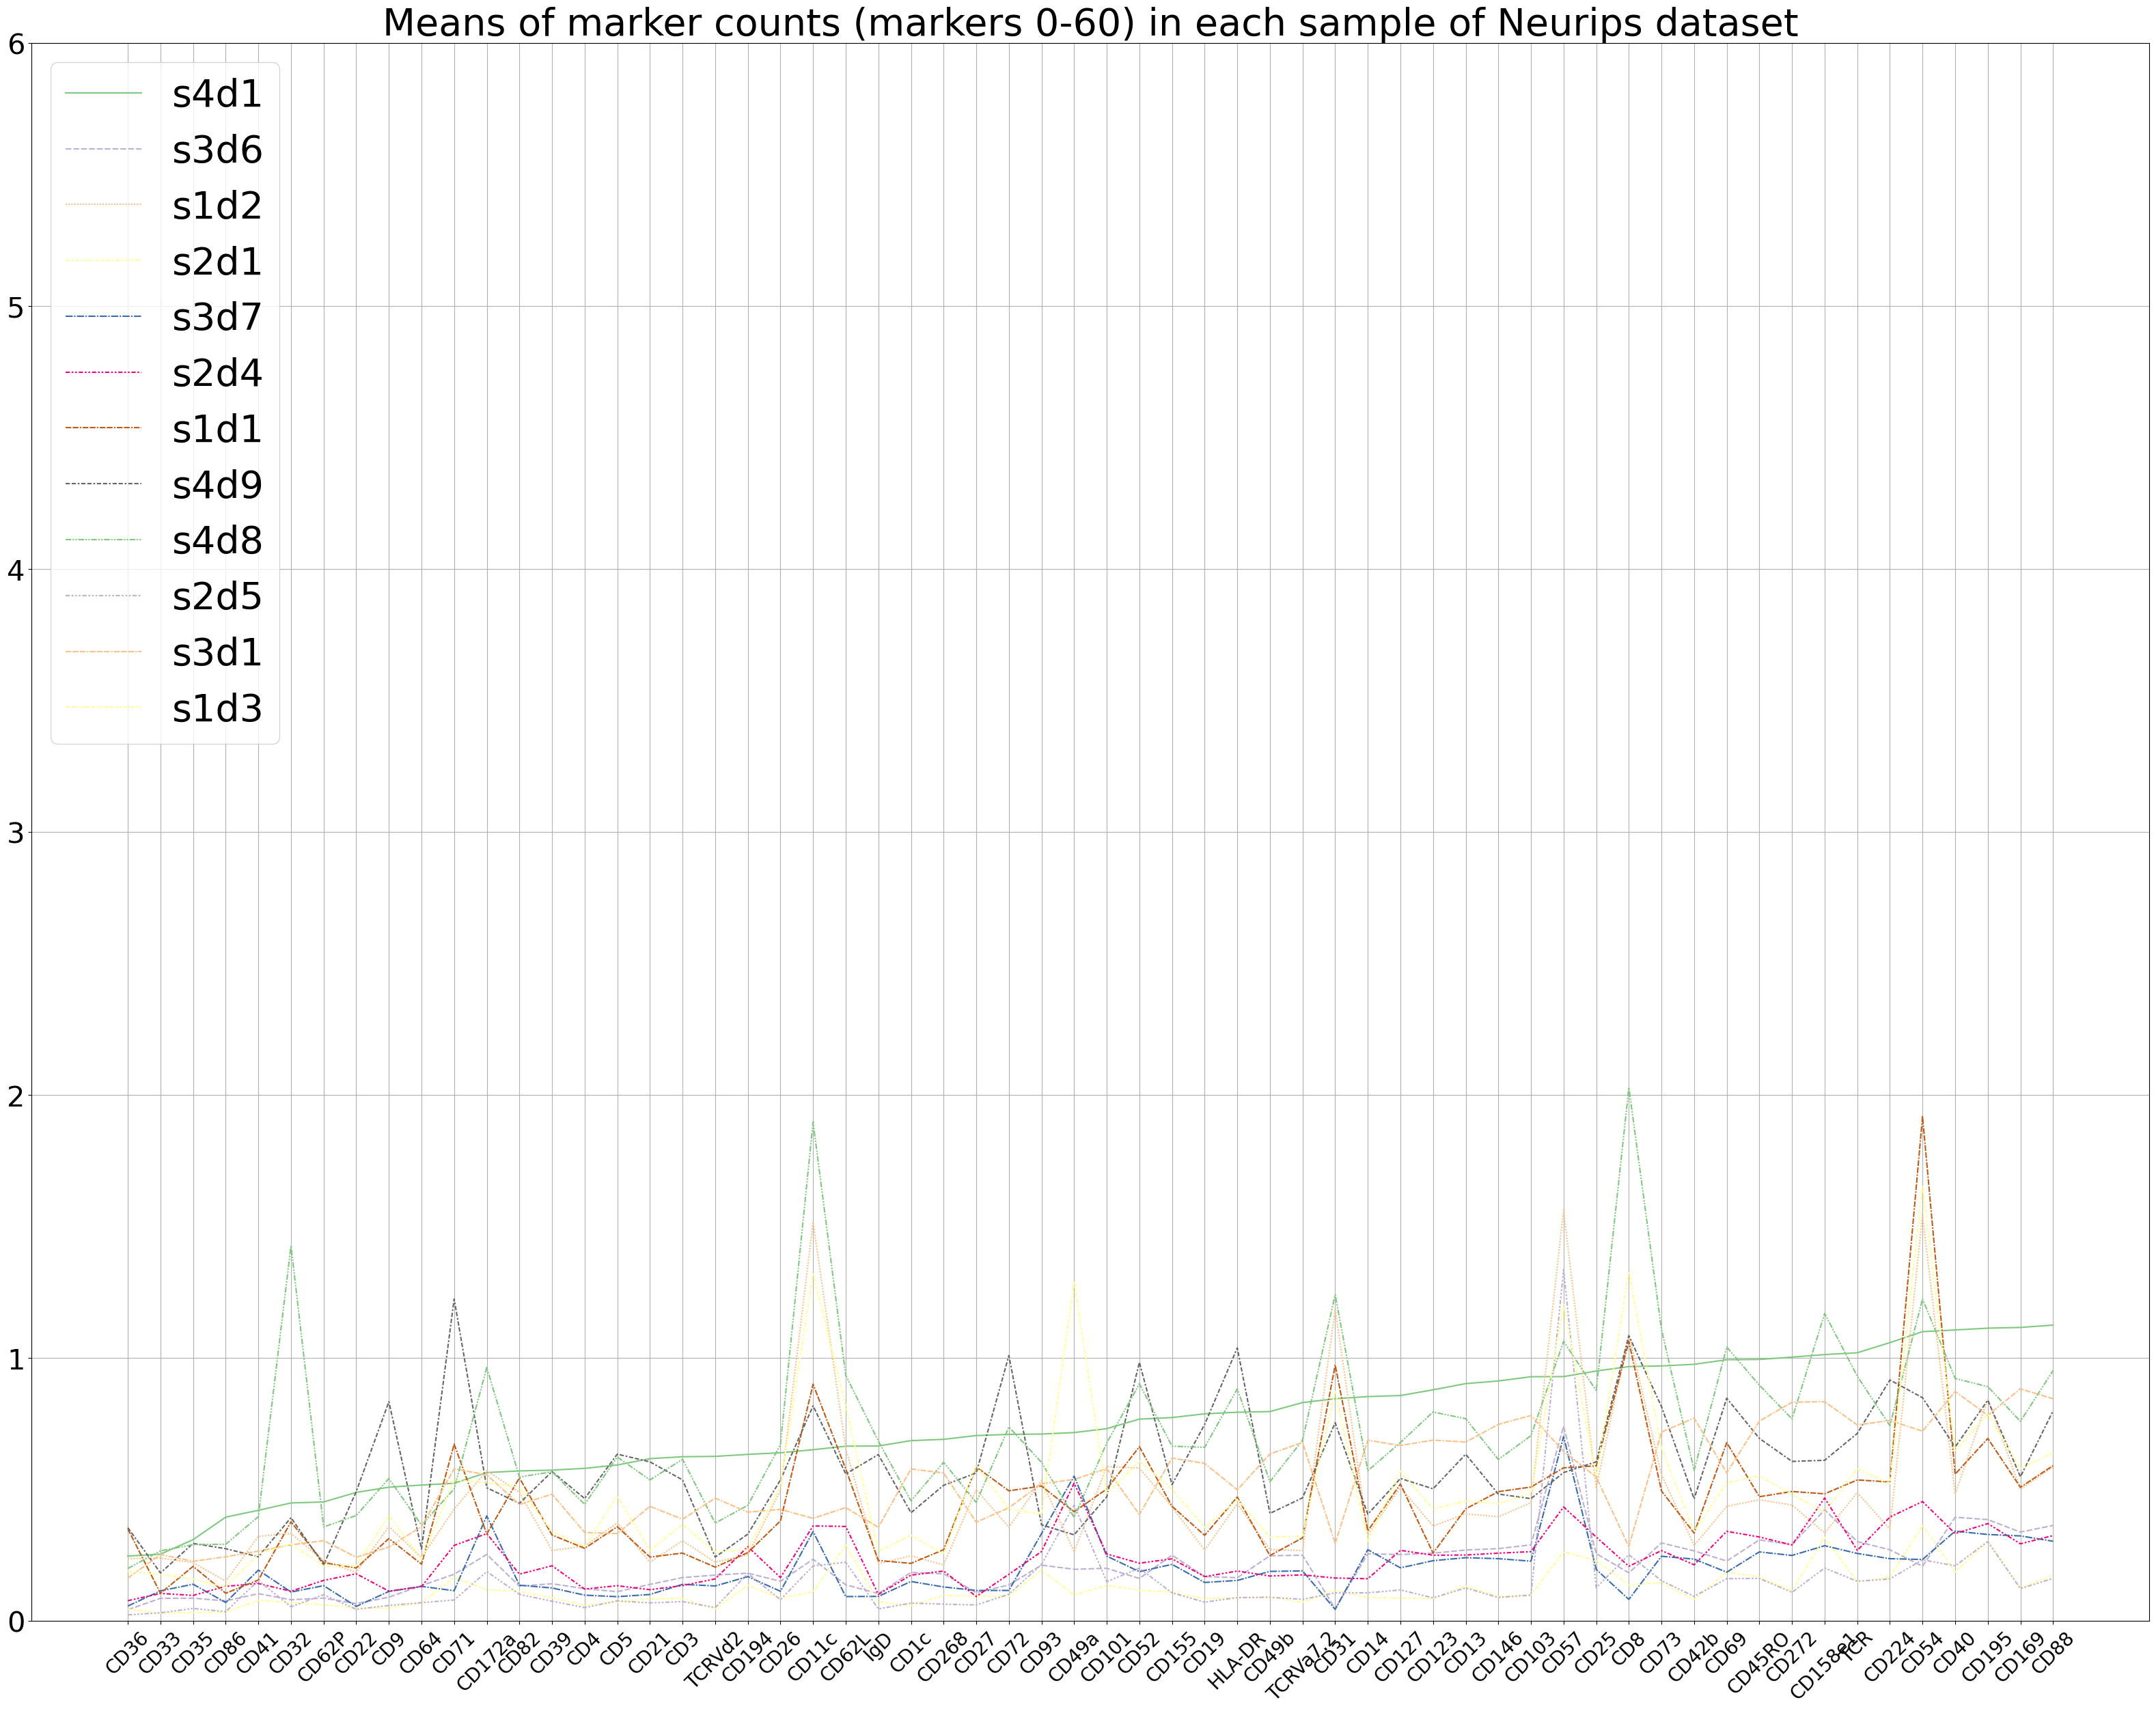

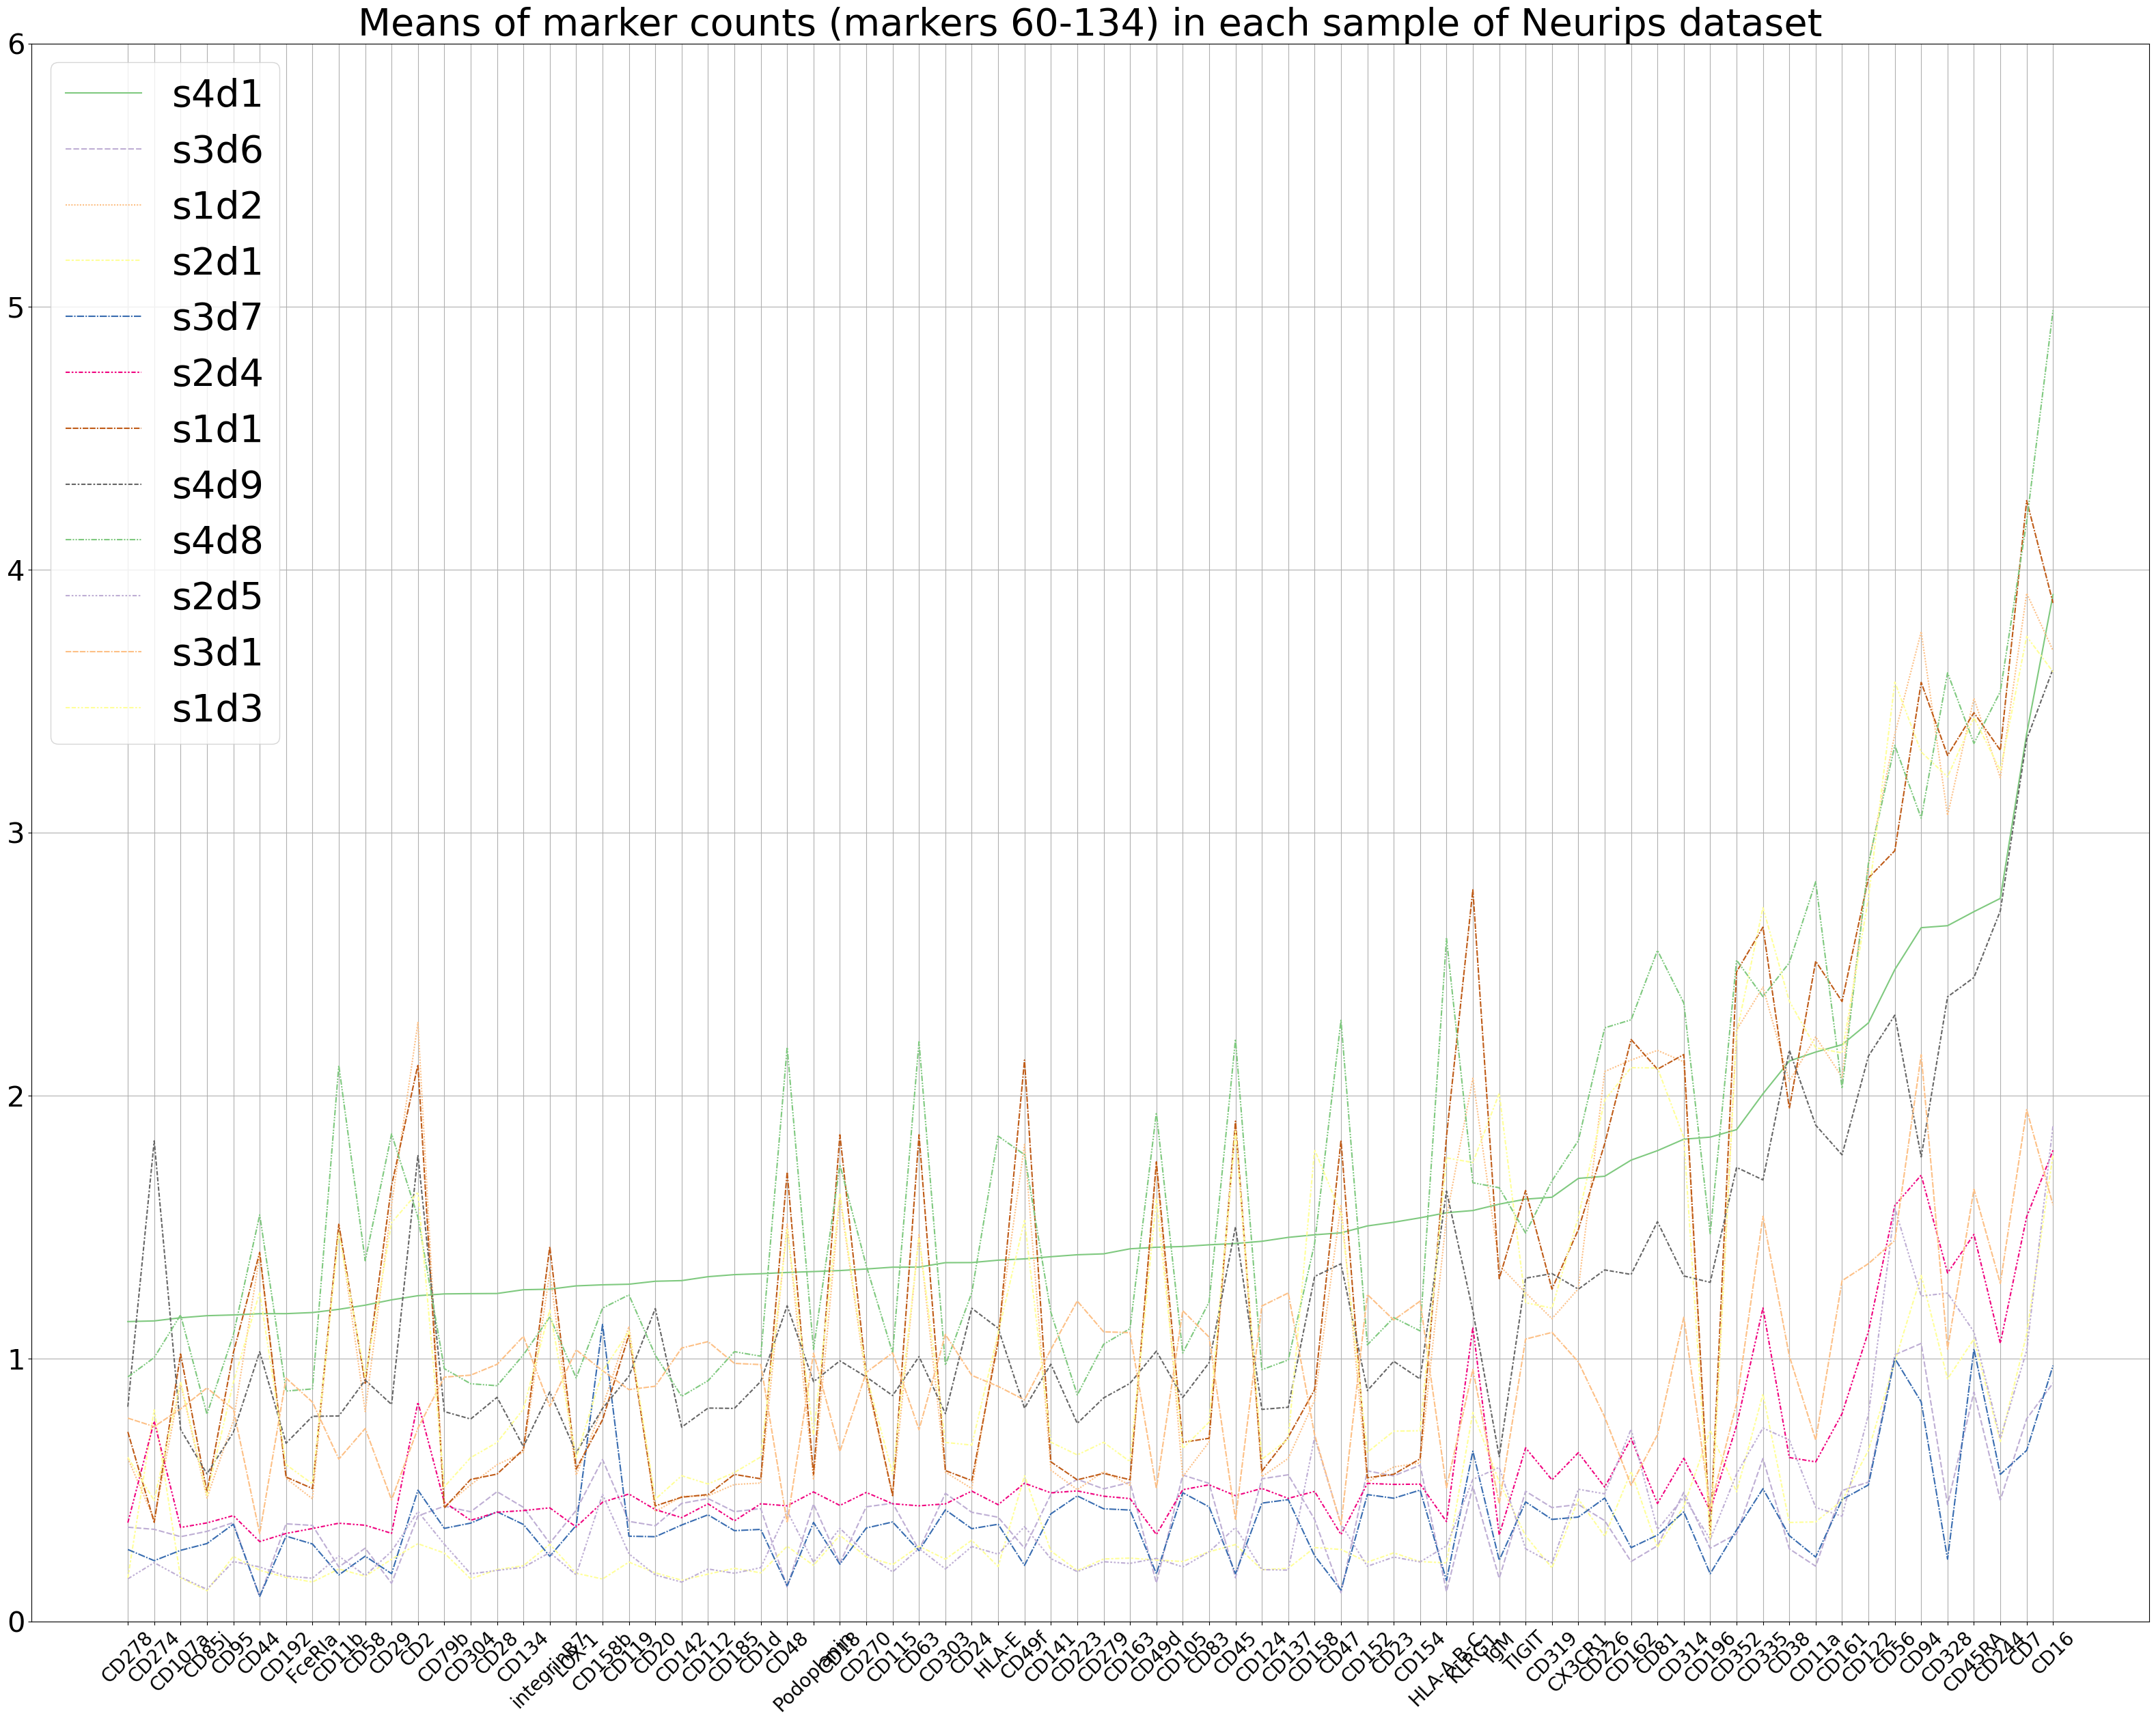

In [77]:
#Only NK-cells from each sample selected

palette = sns.color_palette("Accent")


plt.figure(figsize=[40,30])
a= sns.lineplot(data=df_all.iloc[:60], palette=palette)
a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
a.tick_params(axis='y', labelsize=30)
plt.ylim(0, 6)
plt.legend(loc='upper left', fontsize = 40)
plt.grid()
plt.title("Means of marker counts (markers 0-60) in each sample of Neurips dataset", fontsize=40) ;


plt.figure(figsize=[40,30])
b= sns.lineplot(data=df_all.iloc[60:], palette=palette)
b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)
b.tick_params(axis='y', labelsize=30)
plt.ylim(0, 6)
plt.legend(loc='upper left', fontsize = 40)
plt.grid()
plt.title("Means of marker counts (markers 60-134) in each sample of Neurips dataset", fontsize=40) ;

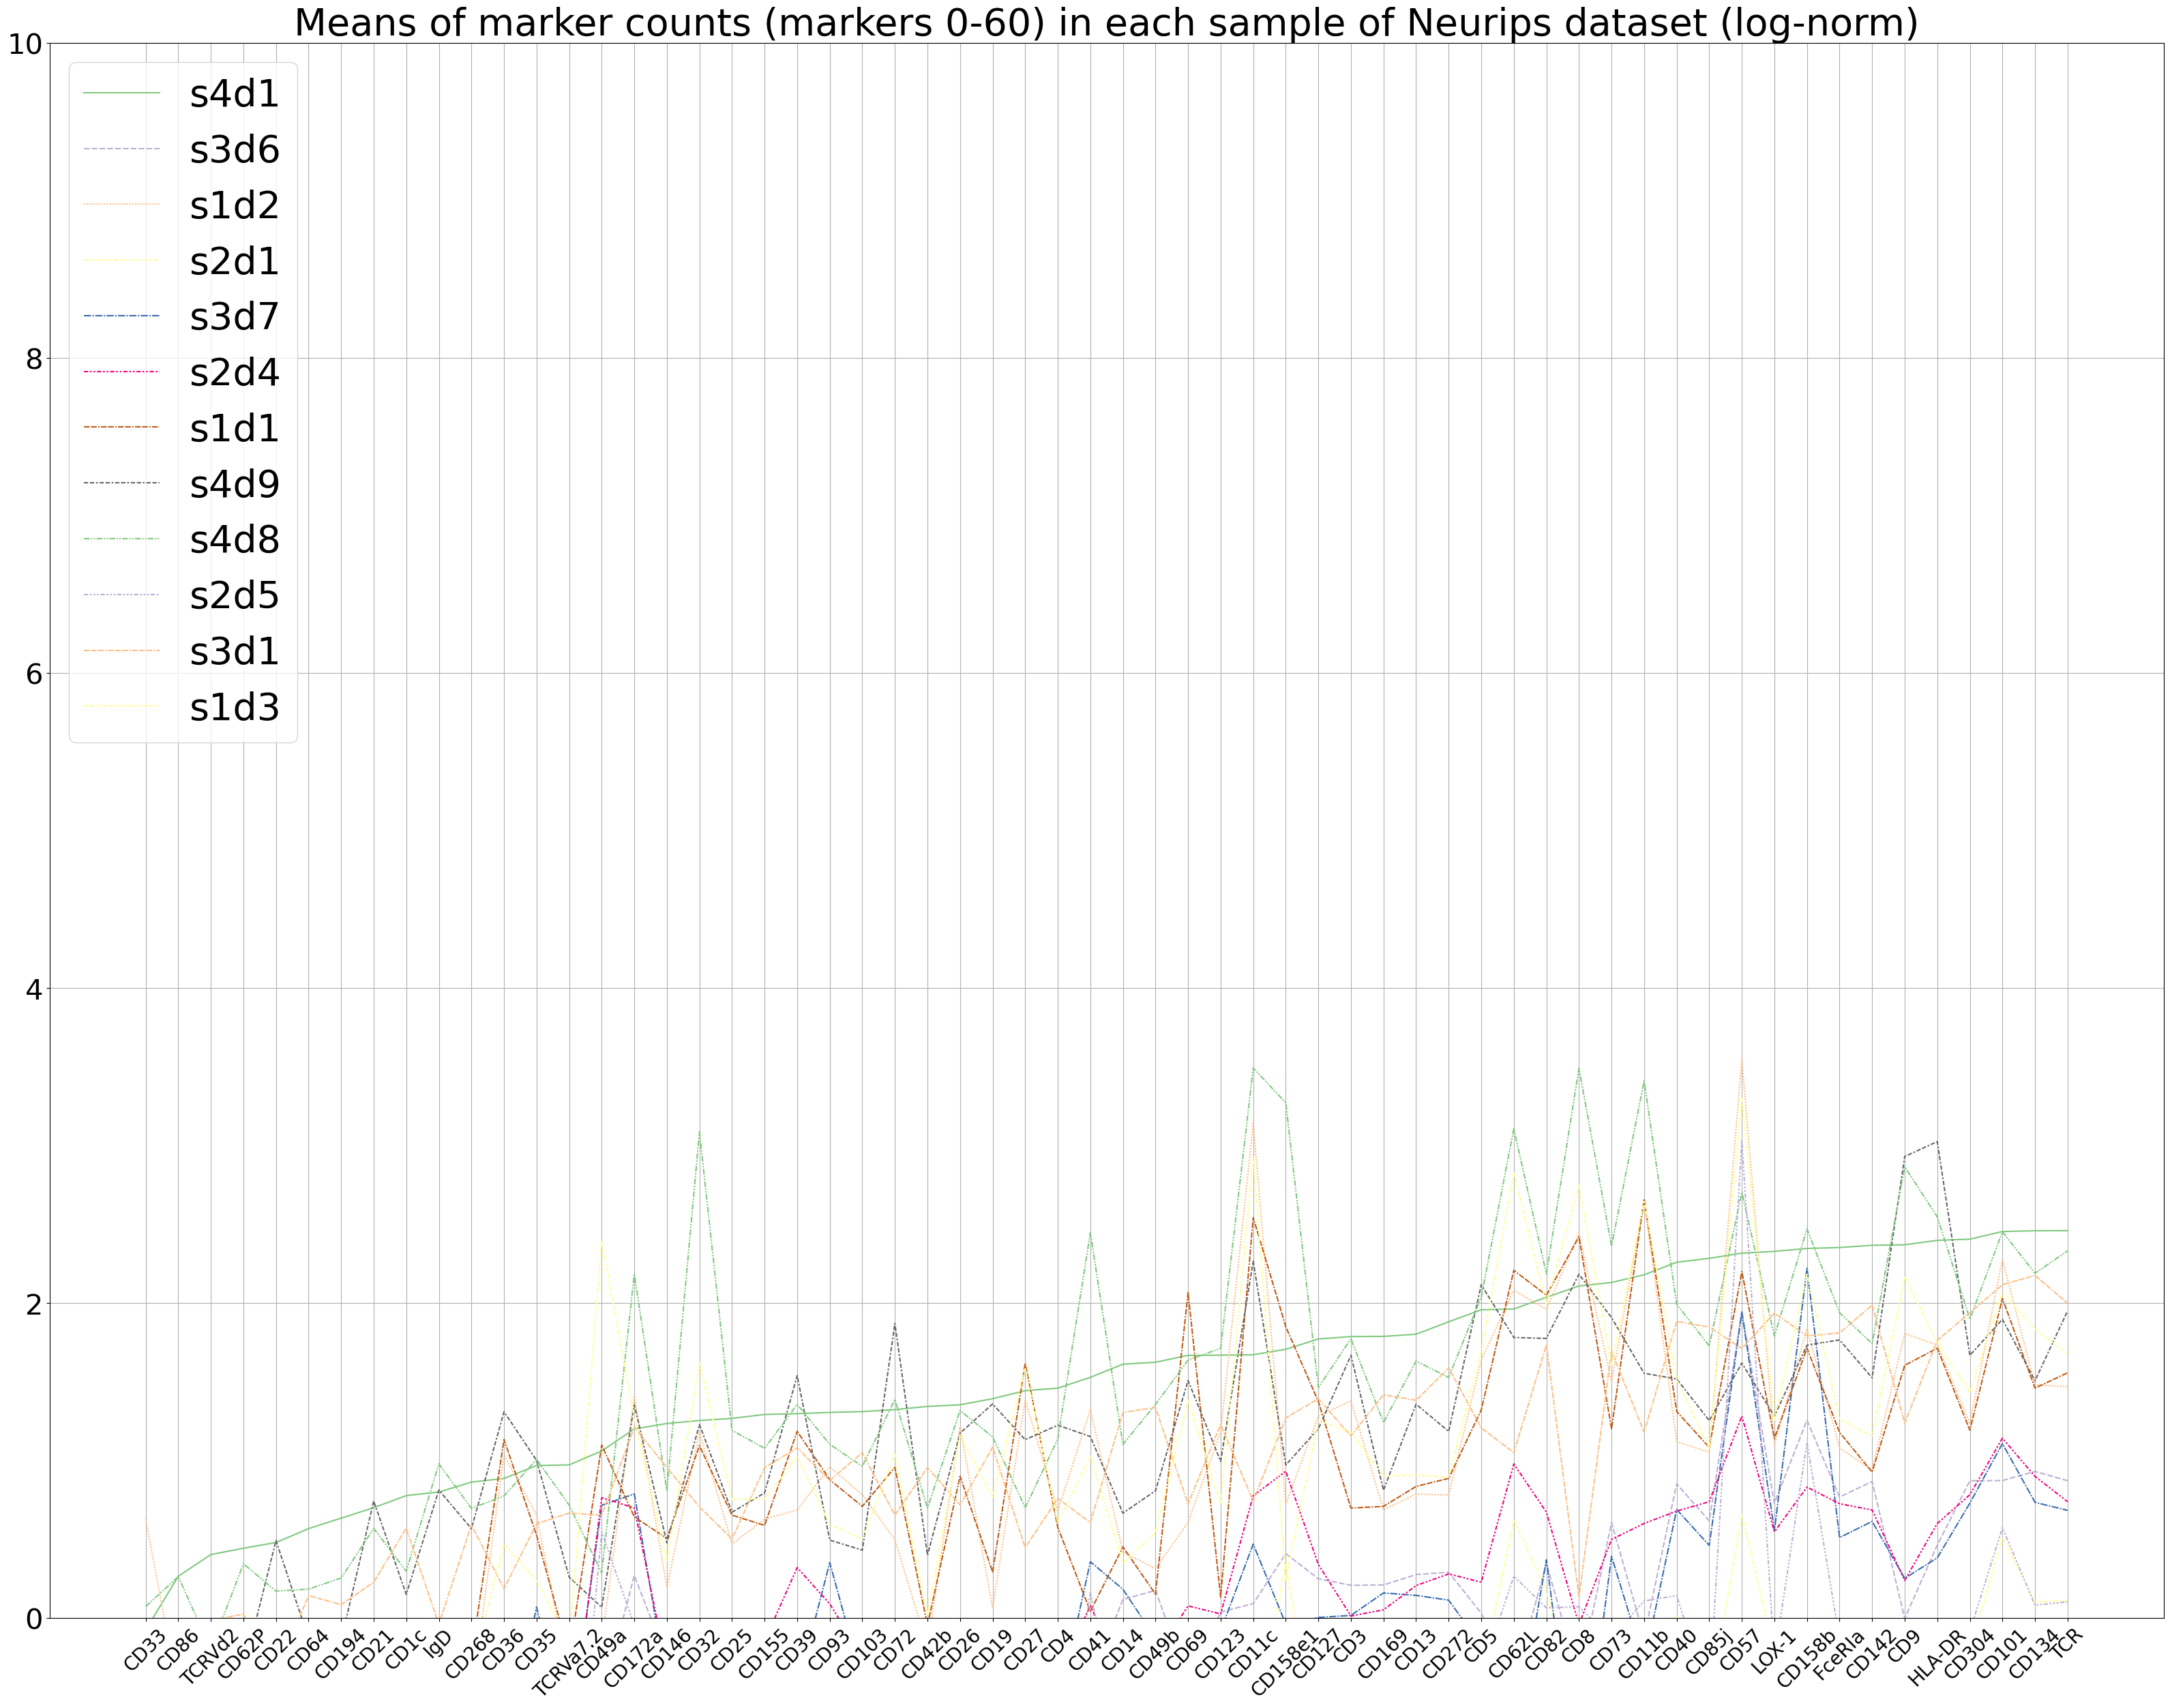

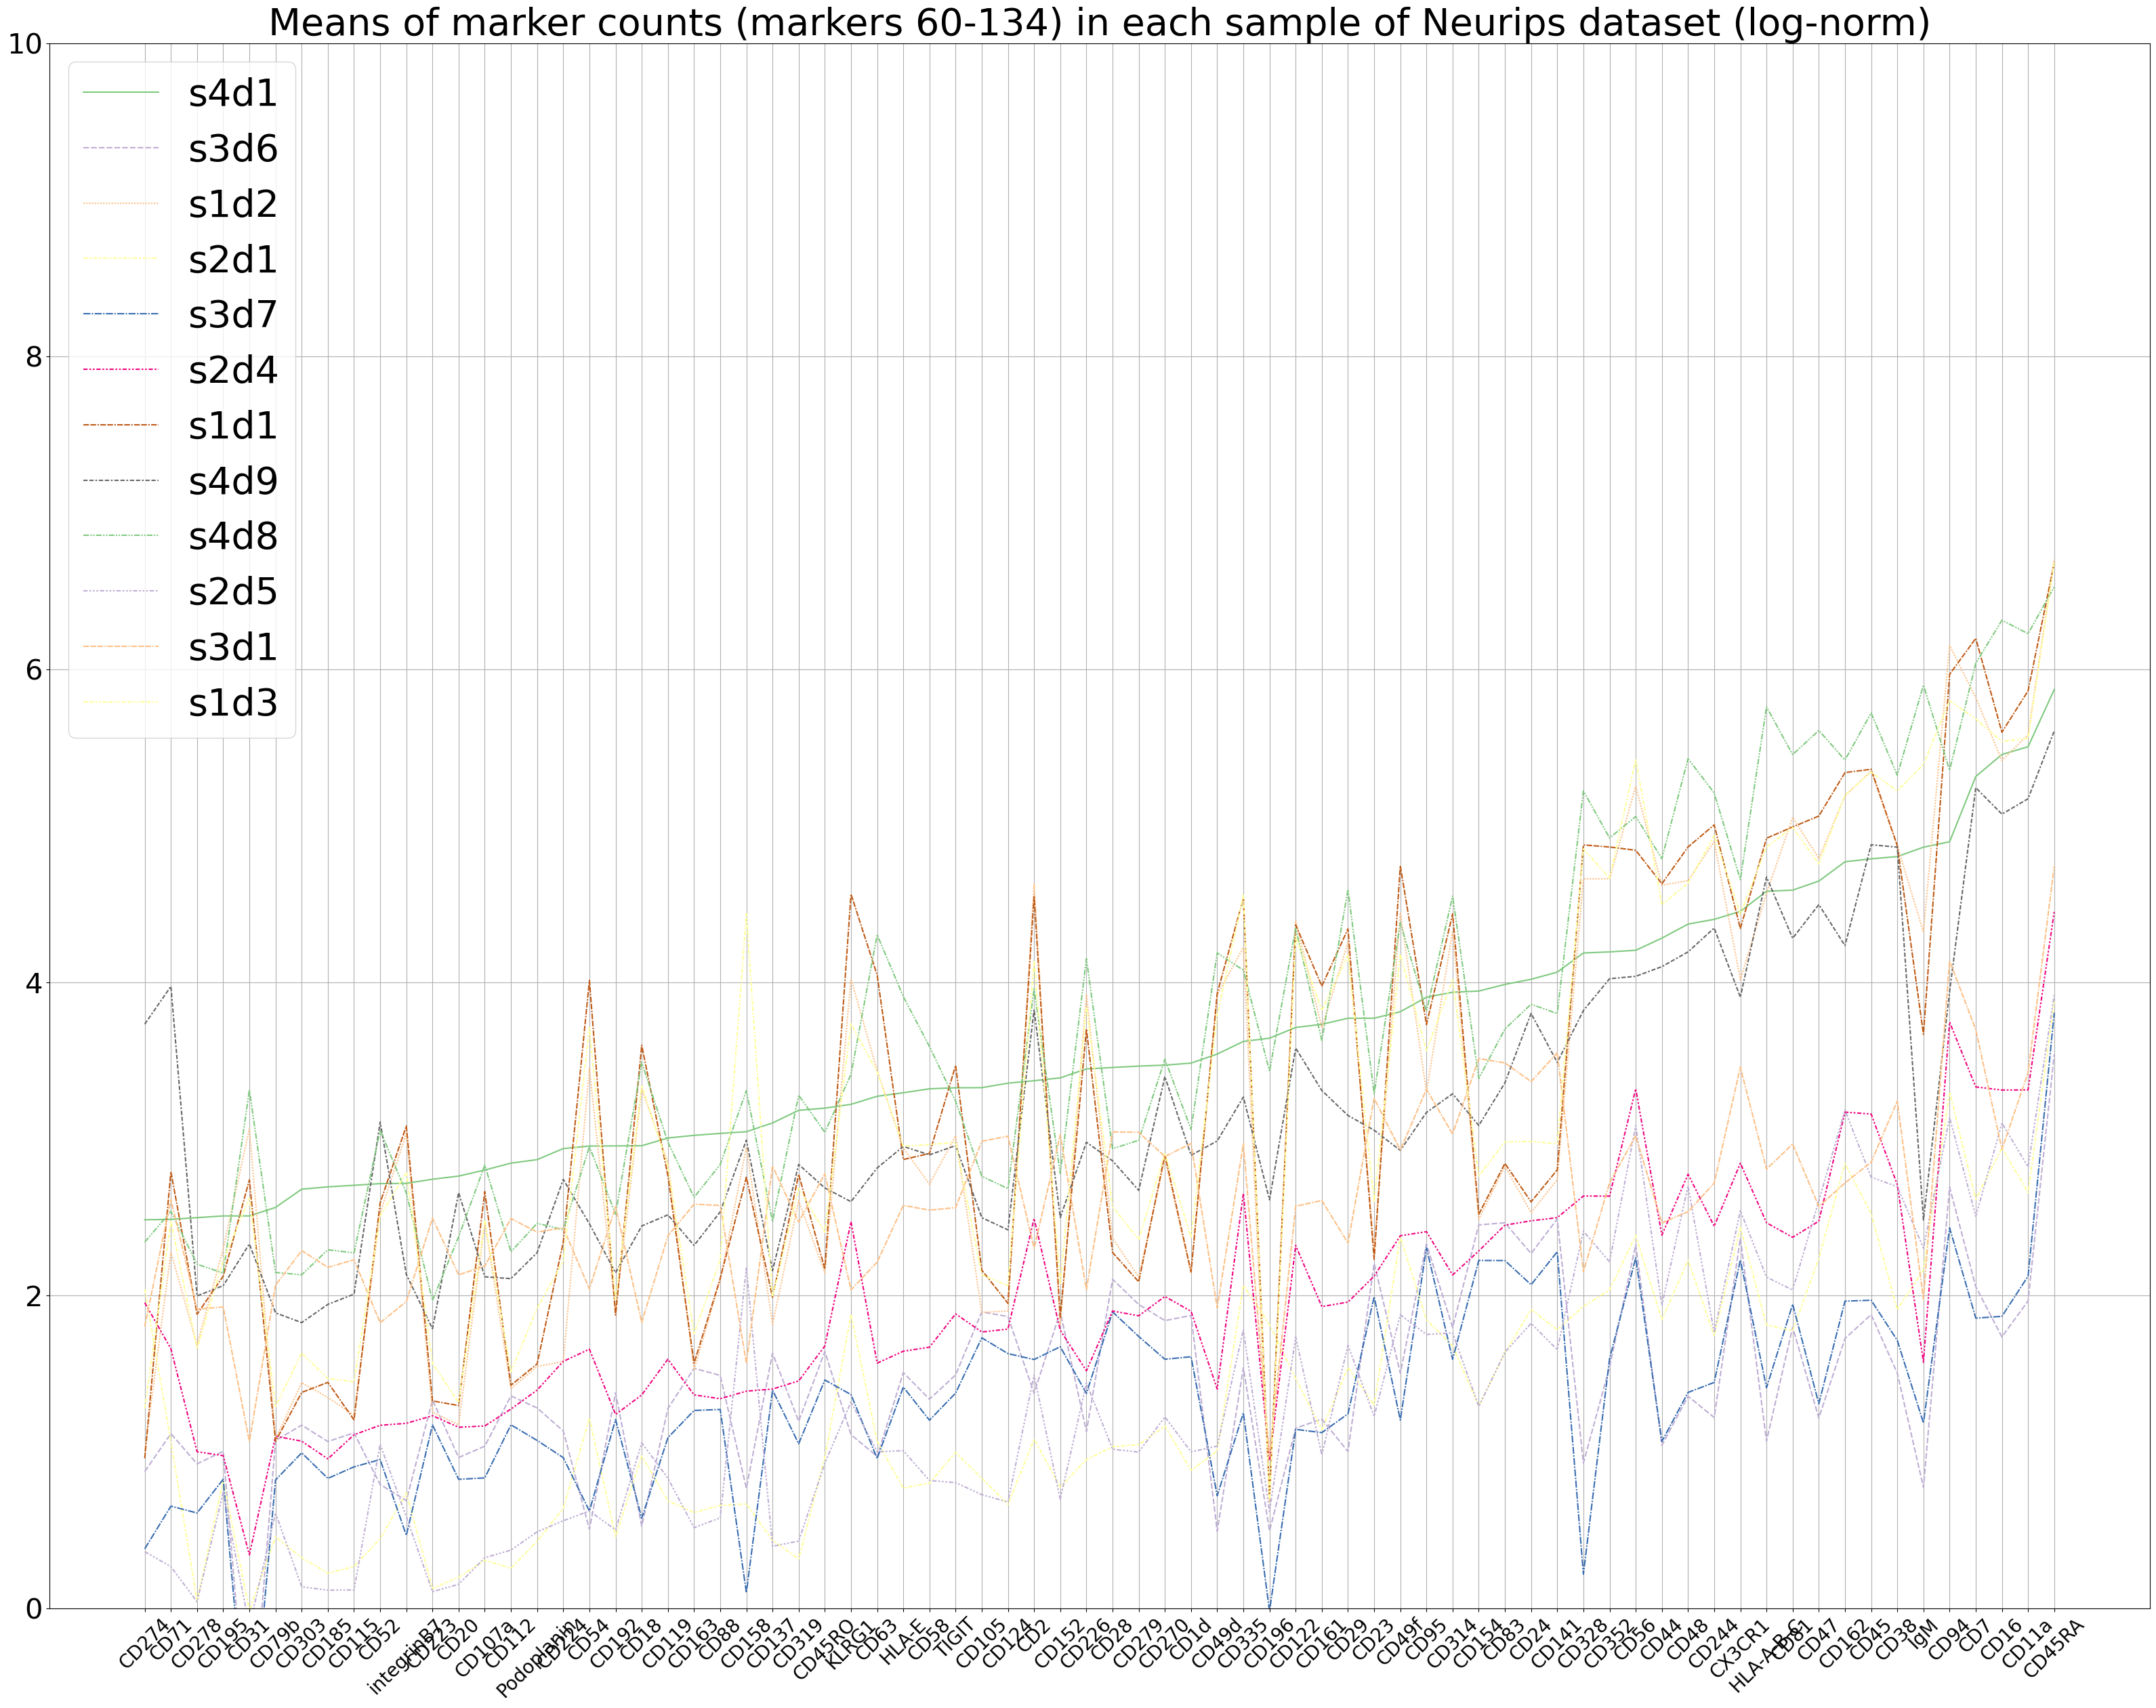

In [69]:
#Only NK-cells from each sample selected, log-normalized

palette = sns.color_palette("Accent")


plt.figure(figsize=[40,30])
a= sns.lineplot(data=np.log(df_all.iloc[:60]), palette=palette)
a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
a.tick_params(axis='y', labelsize=30)
plt.ylim(0, 10)
plt.legend(loc='upper left', fontsize = 40)
plt.grid()
plt.title("Means of marker counts (markers 0-60) in each sample of Neurips dataset (log-norm)", fontsize=40) ;


plt.figure(figsize=[40,30])
b= sns.lineplot(data=np.log(df_all.iloc[60:]), palette=palette)
b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)
b.tick_params(axis='y', labelsize=30)
plt.ylim(0, 10)
plt.legend(loc='upper left', fontsize = 40)
plt.grid()
plt.title("Means of marker counts (markers 60-134) in each sample of Neurips dataset (log-norm)", fontsize=40) ;

### Granja

In [79]:
samples=adata_granja.obs['POOL'].unique().tolist()

samples

['GSM4138872', 'GSM4138873', 'GSM4138874', 'GSM4138880', 'GSM4138885']

In [80]:
sample1=adata_granja[adata_granja.obs['POOL'] == 'GSM4138872']
sample2=adata_granja[adata_granja.obs['POOL'] == 'GSM4138873']
sample3=adata_granja[adata_granja.obs['POOL']== 'GSM4138874']
sample4=adata_granja[adata_granja.obs['POOL']== 'GSM4138880']
sample5=adata_granja[adata_granja.obs['POOL']== 'GSM4138885']

In [81]:
sample1=sample1[sample1.obs['cell_type'] == 'NK']
sample2=sample2[sample2.obs['cell_type'] == 'NK']
sample3=sample3[sample3.obs['cell_type'] == 'NK']
sample4=sample4[sample4.obs['cell_type'] == 'NK']
sample5=sample5[sample5.obs['cell_type'] == 'NK']


In [82]:
sample_GSM4138872=sample1.obsm['protein_expression_clr_granja']
sample_GSM4138873=sample2.obsm['protein_expression_clr_granja']
sample_GSM4138874=sample3.obsm['protein_expression_clr_granja']
sample_GSM4138880=sample4.obsm['protein_expression_clr_granja']
sample_GSM4138885=sample5.obsm['protein_expression_clr_granja']

In [83]:
df1=sample_GSM4138872.mean(axis=0).sort_values()
df2=sample_GSM4138873.mean(axis=0).sort_values()
df3=sample_GSM4138874.mean(axis=0).sort_values()
df4=sample_GSM4138880.mean(axis=0).sort_values()
df5=sample_GSM4138885.mean(axis=0).sort_values()

In [84]:
#combining all dataframes

df_all=pd.concat([df1,df2,df3,df4,df5], axis=1)

In [100]:
df_all=df_all.T

df_all

GSM4138872  GSM4138873
CD4       0.506292    0.606323
CD3       0.681276    0.743509
CD19      0.752550    0.815436
CD14      0.947330    1.050871
CD45RO    1.247297    1.377892
CD127     1.368943    1.534256
CD25      1.397986    1.516621
CD279     1.597490    1.771289
CD15      1.734027    1.885330
CD8       1.773012    1.968285
TIGIT     2.268859    2.430331
CD45RA    3.103269    3.235217
CD16      4.775008    5.158664
CD56      4.814860    5.123244

In [88]:
#adding columns names (=sample names)

df_all.columns=['GSM4138872','GSM4138873','GSM4138874', 'GSM4138880', 'GSM4138885']

df_all

GSM4138872  GSM4138873  GSM4138874  GSM4138880  GSM4138885
CD86      0.000000    0.000000         NaN         NaN         NaN
CD71      0.000000    0.000000         NaN         NaN         NaN
CD22      0.000000    0.000000         NaN         NaN         NaN
CD45      0.000000    0.000000         NaN         NaN         NaN
CD38      0.000000    0.000000         NaN         NaN         NaN
...            ...         ...         ...         ...         ...
CD8       1.773012    1.968285         NaN         NaN         NaN
TIGIT     2.268859    2.430331         NaN         NaN         NaN
CD45RA    3.103269    3.235217         NaN         NaN         NaN
CD16      4.775008    5.158664         NaN         NaN         NaN
CD56      4.814860    5.123244         NaN         NaN         NaN

[141 rows x 5 columns]

In [97]:
#drop rows with only NaNs

df_all.dropna(axis = 0, how = 'all', inplace = True)

In [98]:
df_all = pd.DataFrame(df_all)
df_all != 0
(df_all != 0).any(axis=0)
df_all.loc[:, (df_all != 0).any(axis=0)]
df_all = df_all.loc[:, (df_all != 0).any(axis=0)]

df_all

CD4       CD3      CD19      CD14    CD45RO     CD127  \
GSM4138872  0.506292  0.681276  0.752550  0.947330  1.247297  1.368943   
GSM4138873  0.606323  0.743509  0.815436  1.050871  1.377892  1.534256   

                CD25     CD279      CD15       CD8     TIGIT    CD45RA  \
GSM4138872  1.397986  1.597490  1.734027  1.773012  2.268859  3.103269   
GSM4138873  1.516621  1.771289  1.885330  1.968285  2.430331  3.235217   

                CD16      CD56  
GSM4138872  4.775008  4.814860  
GSM4138873  5.158664  5.123244

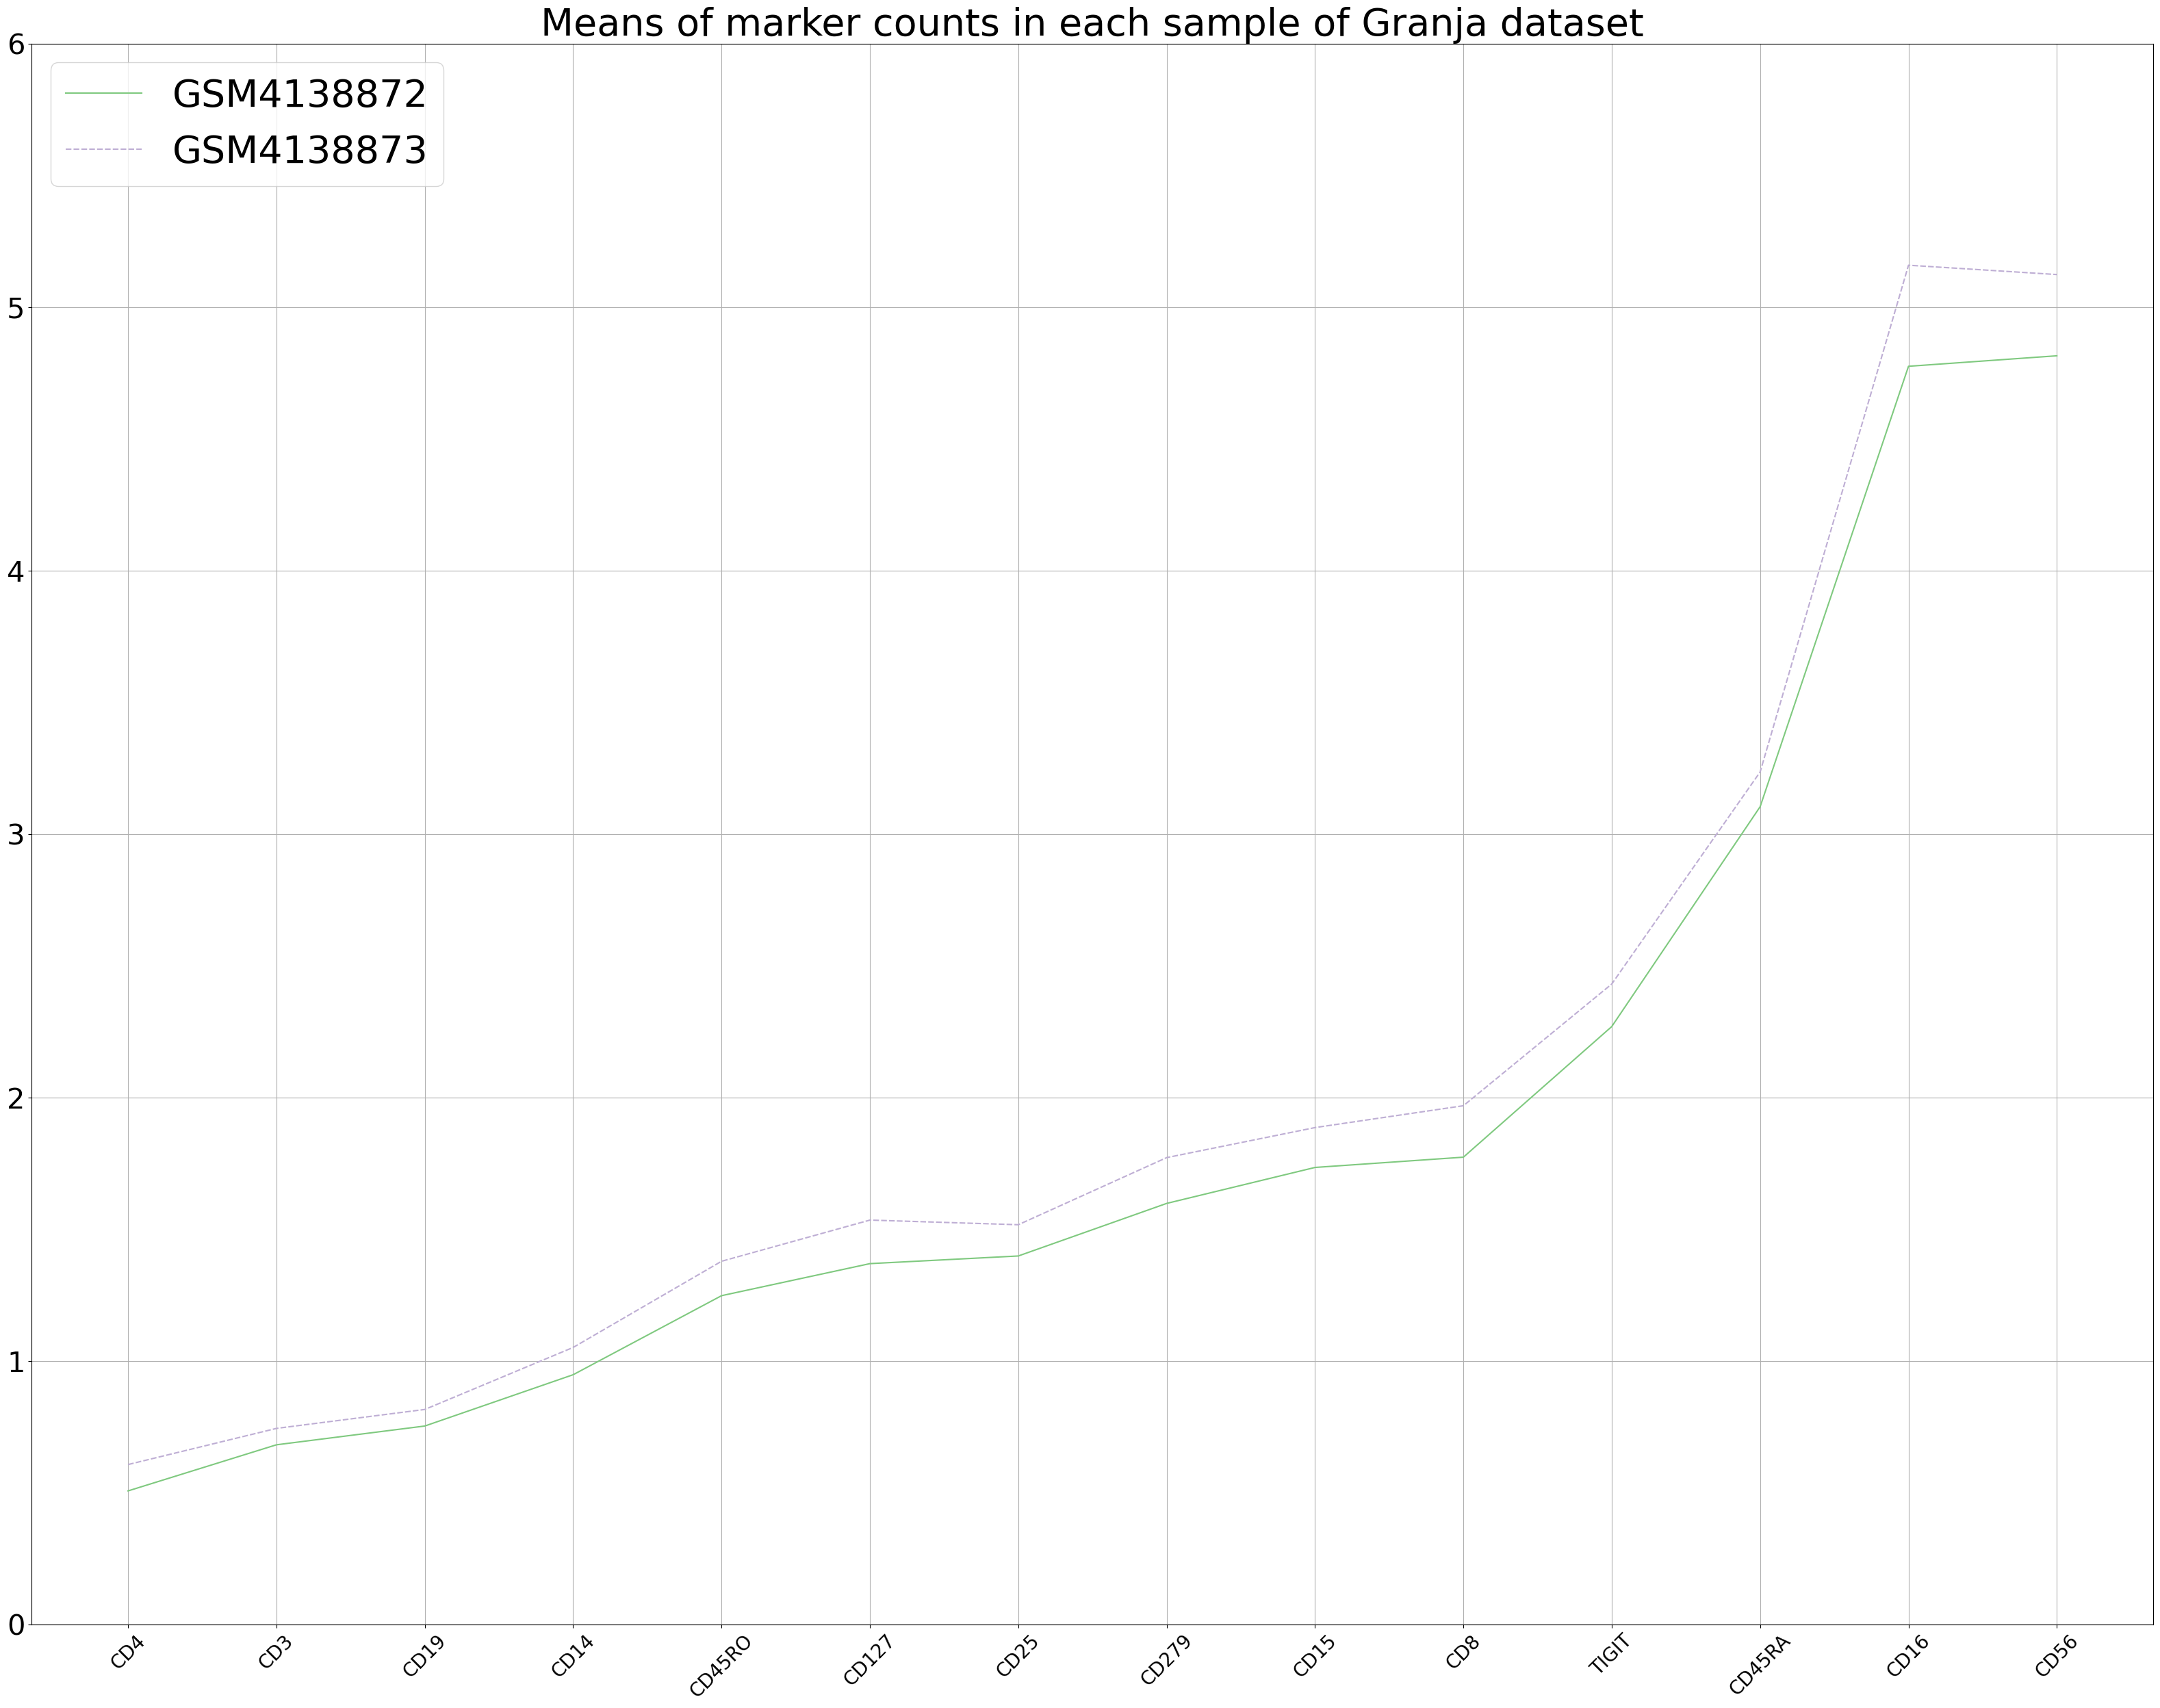

In [103]:
#Only NK-cells from each sample selected

palette = sns.color_palette("Accent")


plt.figure(figsize=[40,30])
a= sns.lineplot(data=df_all, palette=palette)
a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
a.tick_params(axis='y', labelsize=30)
plt.ylim(0, 6)
plt.legend(loc='upper left', fontsize = 40)
plt.grid()
plt.title("Means of marker counts in each sample of Granja dataset", fontsize=40) ;



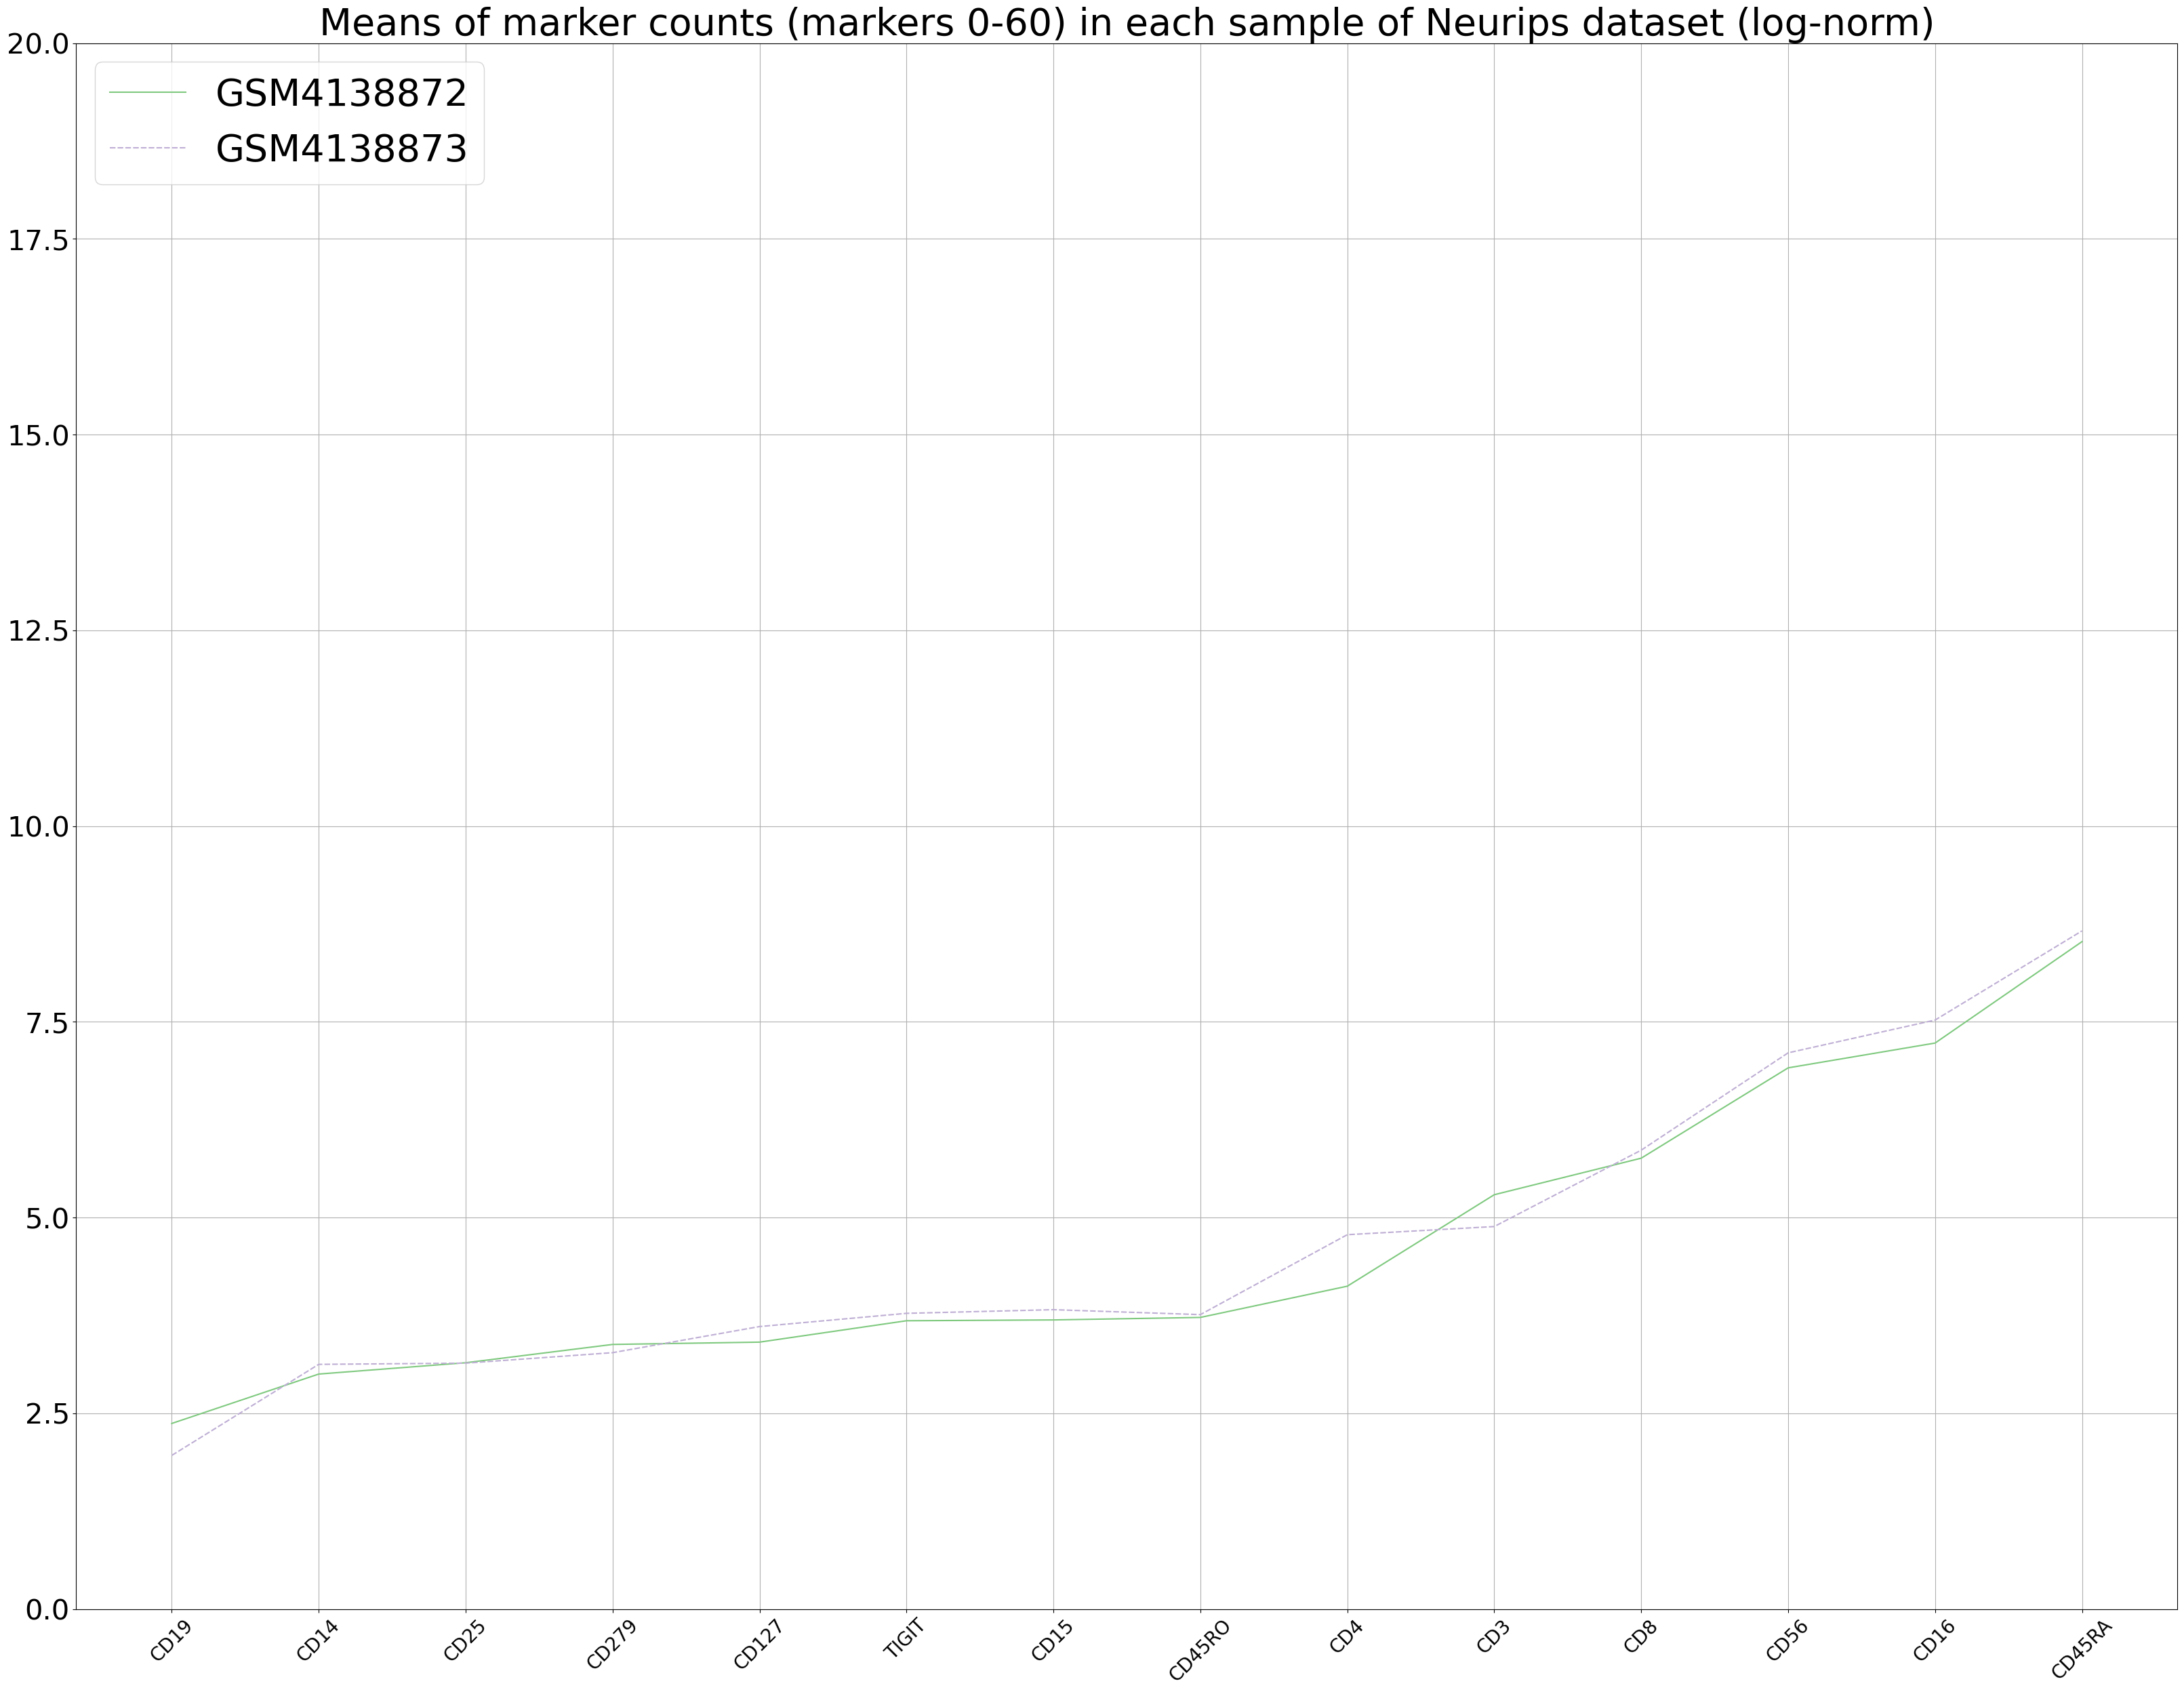

In [110]:
#Only NK-cells from each sample selected, log-normalized

palette = sns.color_palette("Accent")


plt.figure(figsize=[40,30])
a= sns.lineplot(data=np.log(df_all), palette=palette)
a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
a.tick_params(axis='y', labelsize=30)
plt.ylim(0, 20)
plt.legend(loc='upper left', fontsize = 40)
plt.grid()
plt.title("Means of marker counts (markers 0-60) in each sample of Neurips dataset (log-norm)", fontsize=40) ;


### Easigenomics

In [104]:
samples = adata_easi.obs['eg_code'].unique().tolist()

['EG35',
 'EG38',
 'EG58',
 'EG39',
 'EG4',
 'EG48',
 'EG23',
 'EG36',
 'EG61',
 'EG3',
 'EG12',
 'EG46',
 'EG9',
 'EG43',
 'EG56',
 'EG42',
 'EG49',
 'EG37',
 'EG57',
 'EG24',
 'EG11',
 'EG14',
 'EG55',
 'EG28',
 'EG52',
 'EG33',
 'EG10',
 'EG32',
 'EG59',
 'EG16',
 'EG63',
 'EG15',
 'EG21',
 'EG26',
 'EG13',
 'EG53',
 'EG51',
 'EG2',
 'EG40',
 'EG62',
 'EG31',
 'EG7',
 'EG8',
 'EG29',
 'EG41',
 'EG47',
 'EG1',
 'EG6',
 'EG34',
 'EG30',
 'EG60',
 'EG44',
 'EG27',
 'EG22',
 'EG54',
 'EG45',
 'EG5',
 'EG50',
 'EG25']

In [118]:
#save column names
proteins=adata_easi.obsm['protein_expression_clr'].columns

In [119]:
#save means of protein counts/each protein/each sample into a list

list_samples= []

for sample in samples:
    eg=adata_easi[adata_easi.obs['cell_type'] == 'NK']
    eg=adata_easi[adata_easi.obs['eg_code'] == sample]
    prot=eg.obsm['protein_expression_clr']
    prot_mean=prot.mean(axis=0).sort_values()
    list_samples.append(prot_mean)

    

In [121]:
#creating a dataframe from list of lists

df = pd.DataFrame(list_samples, columns = proteins)


CD19      CD10      CD20       CD3       CD2     CD11b     HLADR  \
0   0.448537  0.517241  0.694089  0.494654  1.606367  0.910486  1.138282   
1   0.733674  1.089288  0.392649  0.833598  0.756523  0.651989  1.150177   
2   0.305262  0.482434  0.626202  0.248340  1.407541  1.584338  1.523780   
3   0.691737  0.986514  0.392102  0.791845  0.836717  0.612555  1.090049   
4   0.563074  0.995529  0.260906  0.496335  2.683623  1.342541  0.501954   
5   0.549411  0.717000  0.517116  0.343366  0.813547  1.179146  1.508922   
6   0.796607  3.005452  0.806256  0.746655  0.726841  1.026456  1.092794   
7   0.377700  0.564714  0.492597  0.578518  2.128343  0.814797  0.920698   
8   0.391122  0.522505  0.586464  0.287238  0.867662  0.915611  2.114939   
9   0.266180  0.998670  0.295110  0.716553  2.490606  1.209066  0.629620   
10  0.973342  1.345923  0.329138  0.396216  1.725110  1.539294  0.946302   
11  0.479148  0.550196  0.638762  0.398954  1.427607  0.729867  0.921759   
12  2.485645  2.413838  0.461099  0.246130  0.709492  1.172620  1.587635   
13  0.262998  0.592775  0.278814  0.285525  4.279389  0.440074  2.449659   
14  0.562655  0.626202  0.707155  0.372900  1.074846  0.860664  1.095819   
15  0.296521  0.627551  0.323903  0.233800  1.209568  0.510642  2.591222   
16  0.534748  0.698661  0.475574  0.383422  0.899861  0.909344  1.326490   
17  0.495410  0.668705  0.655966  0.368747  1.286157  0.805065  1.026563   
18  0.319615  0.471378  0.658934  0.444466  2.047489  1.025916  1.036709   
19  1.228374  3.671207  0.895507  0.683695  0.534554  0.639745  1.627194   
20  1.782034  3.918913  0.336629  0.187702  0.995112  1.380376  1.801659   
21  1.184852  2.277077  0.514161  0.242711  1.336285  1.488085  1.014428   
22  0.536673  0.568852  0.671448  0.408414  1.371632  0.861239  1.001360   
23  0.510814  1.138978  0.406046  0.457468  0.883199  0.869945  0.809762   
24  0.509963  0.636275  0.594484  0.366059  1.118538  0.783047  1.334995   
25  0.575355  0.706480  0.608374  0.305136  0.885789  0.868721  0.908885   
26  1.068242  1.179713  0.952765  0.635362  2.378373  1.257941  1.282464   
27  0.585741  0.735700  0.744420  0.327289  0.941792  0.864910  0.931040   
28  0.534060  0.625217  0.662745  0.372214  1.082605  0.874006  1.158000   
29  1.201598  1.916706  0.484066  0.321569  1.387937  1.696355  0.844637   
30  0.324378  0.448711  0.488013  0.237394  0.751091  1.464045  2.056684   
31  1.476700  2.013784  0.429390  0.245128  0.767168  1.678677  1.202339   
32  1.331273  3.619568  0.432006  0.200591  0.706637  0.735541  1.306663   
33  0.389516  0.899711  0.913814  0.295489  1.545469  1.028901  1.210759   
34  1.306242  2.767509  0.442405  0.253799  1.021475  1.433807  1.601782   
35  0.574408  0.674223  0.578290  0.327163  0.934251  0.667983  1.453672   
36  1.150099  0.413413  0.480179  0.224552  0.852008  0.581694  2.520793   
37  0.628058  1.203302  0.412824  0.648815  2.652521  1.131366  0.710693   
38  0.356764  0.454472  0.428388  0.334980  1.099127  0.637878  1.191470   
39  0.308840  0.431511  0.460336  0.219137  0.744214  1.812329  1.864799   
40  0.592654  0.822533  0.764059  0.379360  0.952348  0.825435  0.903261   
41  0.347850  0.830483  0.401087  0.381246  0.923057  0.912264  1.507240   
42  0.353389  0.910044  0.443741  0.403338  0.831650  0.979401  1.380372   
43  0.458280  1.426499  0.377456  0.603557  1.055979  0.822768  0.668600   
44  0.392246  0.450232  0.441026  0.520892  1.535879  0.594616  0.946870   
45  0.486688  0.545124  0.620468  0.382249  1.495564  0.807083  0.946917   
46  0.328282  1.265878  0.475668  0.755967  2.406954  1.059137  0.843017   
47  0.503544  1.131779  0.420148  0.301560  0.893796  1.216904  1.212942   
48  0.404747  0.539183  0.627590  0.508886  1.664147  0.727620  0.866737   
49  0.596054  0.828128  0.784815  0.347362  0.838926  0.883467  1.005038   
50  0.499037  0.588941  0.607292  0.308735  0.815296  1.253198  1.058227   
51  0.300041  0.509719  0.411041  0.192181  1.347673  1.

In [122]:
df=df.T


0         1         2         3         4         5         6   \
CD19     0.448537  0.733674  0.305262  0.691737  0.563074  0.549411  0.796607   
CD10     0.517241  1.089288  0.482434  0.986514  0.995529  0.717000  3.005452   
CD20     0.694089  0.392649  0.626202  0.392102  0.260906  0.517116  0.806256   
CD3      0.494654  0.833598  0.248340  0.791845  0.496335  0.343366  0.746655   
CD2      1.606367  0.756523  1.407541  0.836717  2.683623  0.813547  0.726841   
CD11b    0.910486  0.651989  1.584338  0.612555  1.342541  1.179146  1.026456   
HLADR    1.138282  1.150177  1.523780  1.090049  0.501954  1.508922  1.092794   
CD38     0.539151  0.329450  0.679263  0.360523  1.271636  0.761560  0.434401   
CD11c    0.987901  0.560880  1.571974  0.597207  0.493910  1.402230  0.788130   
CD7      0.982956  0.436479  0.821965  0.552535  3.469045  0.488444  0.380121   
CD45     1.581447  1.067457  1.690245  1.009070  1.261513  1.503869  1.006317   
CD33     0.579743  0.457584  1.190742  1.077105  0.717525  0.645155  0.618616   
CD81     0.884947  0.849688  0.657749  0.718990  0.885145  0.682107  0.692601   
CD73     0.414128  1.075815  0.245087  1.048470  0.639973  0.282186  1.104866   
CD123    0.647629  0.901923  0.779253  0.877279  0.426961  0.854404  0.648369   
CD14     0.669005  0.496538  0.829501  0.492651  0.365596  0.625686  0.614000   
CD45RA   0.616340  0.328251  0.444526  0.344890  1.203895  0.681126  0.451445   
CD45RO   0.577295  0.465233  0.478126  0.471634  0.294266  0.552821  0.439561   
CD4      0.778748  0.599137  0.952236  0.729407  0.380979  0.805807  0.644715   
CD8a     0.739866  0.420984  0.495728  0.429063  0.334275  0.307097  0.704664   
CD197    0.566698  0.400206  0.300790  0.378870  0.217810  0.359882  0.327366   
CD127    0.411660  0.294504  0.330374  0.298505  0.472099  0.339053  0.341351   
CD56     0.618250  0.740529  0.649828  0.717299  0.804081  0.531634  0.686581   
CD5      0.739384  0.431901  0.582078  0.510782  0.839155  0.352358  0.403047   
CD15     1.000074  1.115313  0.806806  1.078738  1.024278  0.959233  0.822555   
CD64     0.416107  0.468107  0.787143  0.444188  0.128840  0.520424  0.544582   
CD117    0.353292  1.642199  0.242874  1.139615  1.157520  0.872469  0.337555   
CD24     0.340534  0.230233  0.245265  0.260386  0.133427  0.252657  0.362959   
CD44     2.578000  2.138599  3.236163  2.553254  2.327197  3.369586  2.165675   
CD58     0.569441  1.127362  0.683364  1.247979  0.588197  2.098770  0.713014   
CD66ace  0.667035  0.534961  0.441328  0.518352  0.193379  0.469138  0.510630   
CD13     0.265699  0.173746  0.569654  0.238786  0.144667  0.222388  0.258271   
CD34     0.723954  1.249160  0.537006  0.936024  1.029990  1.053661  1.341737   

               7         8         9   ...        49        50        51  \
CD19     0.377700  0.391122  0.266180  ...  0.596054  0.499037  0.300041   
CD10     0.564714  0.522505  0.998670  ...  0.828128  0.588941  0.509719   
CD20     0.492597  0.586464  0.295110  ...  0.784815  0.607292  0.411041   
CD3      0.578518  0.287238  0.716553  ...  0.347362  0.308735  0.192181   
CD2      2.128343  0.867662  2.490606  ...  0.838926  0.815296  1.347673   
CD11b    0.814797  0.915611  1.209066  ...  0.883467  1.253198  1.306381   
HLADR    0.920698  2.114939  0.629620  ...  1.005038  1.058227  1.910737   
CD38     0.555779  0.510450  0.460375  ...  0.892021  0.474534  0.697476   
CD11c    0.789727  1.187394  0.343037  ...  0.803545  0.958856  1.314410   
CD7      1.272757  0.378065  1.977228  ...  0.524332  0.386120  0.531747   
CD45     1.735112  1.248019  2.072622  ...  0.576953  0.971872  1.853994   
CD33     0.471471  1.001446  0.471090  ...  0.577128  0.889714  1.645008   
CD81     0.968735  0.915680  1.097668  ...  0.686590  0.759462  0.595944   
CD73     0.315076  0.315084  0.442528  ...  0.454250  0.397642  0.426699   
CD123    0.478169  0.743228  0.362218  ...  0.754099  0.773067  0.790694   
CD14     0.689512  0.806719  0.376965  ...  

In [123]:
#add column names

df.columns=samples

EG35      EG38      EG58      EG39       EG4      EG48      EG23  \
CD19     0.448537  0.733674  0.305262  0.691737  0.563074  0.549411  0.796607   
CD10     0.517241  1.089288  0.482434  0.986514  0.995529  0.717000  3.005452   
CD20     0.694089  0.392649  0.626202  0.392102  0.260906  0.517116  0.806256   
CD3      0.494654  0.833598  0.248340  0.791845  0.496335  0.343366  0.746655   
CD2      1.606367  0.756523  1.407541  0.836717  2.683623  0.813547  0.726841   
CD11b    0.910486  0.651989  1.584338  0.612555  1.342541  1.179146  1.026456   
HLADR    1.138282  1.150177  1.523780  1.090049  0.501954  1.508922  1.092794   
CD38     0.539151  0.329450  0.679263  0.360523  1.271636  0.761560  0.434401   
CD11c    0.987901  0.560880  1.571974  0.597207  0.493910  1.402230  0.788130   
CD7      0.982956  0.436479  0.821965  0.552535  3.469045  0.488444  0.380121   
CD45     1.581447  1.067457  1.690245  1.009070  1.261513  1.503869  1.006317   
CD33     0.579743  0.457584  1.190742  1.077105  0.717525  0.645155  0.618616   
CD81     0.884947  0.849688  0.657749  0.718990  0.885145  0.682107  0.692601   
CD73     0.414128  1.075815  0.245087  1.048470  0.639973  0.282186  1.104866   
CD123    0.647629  0.901923  0.779253  0.877279  0.426961  0.854404  0.648369   
CD14     0.669005  0.496538  0.829501  0.492651  0.365596  0.625686  0.614000   
CD45RA   0.616340  0.328251  0.444526  0.344890  1.203895  0.681126  0.451445   
CD45RO   0.577295  0.465233  0.478126  0.471634  0.294266  0.552821  0.439561   
CD4      0.778748  0.599137  0.952236  0.729407  0.380979  0.805807  0.644715   
CD8a     0.739866  0.420984  0.495728  0.429063  0.334275  0.307097  0.704664   
CD197    0.566698  0.400206  0.300790  0.378870  0.217810  0.359882  0.327366   
CD127    0.411660  0.294504  0.330374  0.298505  0.472099  0.339053  0.341351   
CD56     0.618250  0.740529  0.649828  0.717299  0.804081  0.531634  0.686581   
CD5      0.739384  0.431901  0.582078  0.510782  0.839155  0.352358  0.403047   
CD15     1.000074  1.115313  0.806806  1.078738  1.024278  0.959233  0.822555   
CD64     0.416107  0.468107  0.787143  0.444188  0.128840  0.520424  0.544582   
CD117    0.353292  1.642199  0.242874  1.139615  1.157520  0.872469  0.337555   
CD24     0.340534  0.230233  0.245265  0.260386  0.133427  0.252657  0.362959   
CD44     2.578000  2.138599  3.236163  2.553254  2.327197  3.369586  2.165675   
CD58     0.569441  1.127362  0.683364  1.247979  0.588197  2.098770  0.713014   
CD66ace  0.667035  0.534961  0.441328  0.518352  0.193379  0.469138  0.510630   
CD13     0.265699  0.173746  0.569654  0.238786  0.144667  0.222388  0.258271   
CD34     0.723954  1.249160  0.537006  0.936024  1.029990  1.053661  1.341737   

             EG36      EG61       EG3  ...      EG30      EG60      EG44  \
CD19     0.377700  0.391122  0.266180  ...  0.596054  0.499037  0.300041   
CD10     0.564714  0.522505  0.998670  ...  0.828128  0.588941  0.509719   
CD20     0.492597  0.586464  0.295110  ...  0.784815  0.607292  0.411041   
CD3      0.578518  0.287238  0.716553  ...  0.347362  0.308735  0.192181   
CD2      2.128343  0.867662  2.490606  ...  0.838926  0.815296  1.347673   
CD11b    0.814797  0.915611  1.209066  ...  0.883467  1.253198  1.306381   
HLADR    0.920698  2.114939  0.629620  ...  1.005038  1.058227  1.910737   
CD38     0.555779  0.510450  0.460375  ...  0.892021  0.474534  0.697476   
CD11c    0.789727  1.187394  0.343037  ...  0.803545  0.958856  1.314410   
CD7      1.272757  0.378065  1.977228  ...  0.524332  0.386120  0.531747   
CD45     1.735112  1.248019  2.072622  ...  0.576953  0.971872  1.853994   
CD33     0.471471  1.001446  0.471090  ...  0.577128  0.889714  1.645008   
CD81     0.968735  0.915680  1.097668  ...  0.686590  0.759462  0.595944   
CD73     0.315076  0.315084  0.442528  ...  0.454250  0.397642  0.426699   
CD123    0.478169  0.743228  0.362218  ...  0.754099  0.773067  0.790694   
CD14     0.689512  0.806719  0.376965  ...

In [124]:
df=df.T

CD19      CD10      CD20       CD3       CD2     CD11b     HLADR  \
EG35  0.448537  0.517241  0.694089  0.494654  1.606367  0.910486  1.138282   
EG38  0.733674  1.089288  0.392649  0.833598  0.756523  0.651989  1.150177   
EG58  0.305262  0.482434  0.626202  0.248340  1.407541  1.584338  1.523780   
EG39  0.691737  0.986514  0.392102  0.791845  0.836717  0.612555  1.090049   
EG4   0.563074  0.995529  0.260906  0.496335  2.683623  1.342541  0.501954   
EG48  0.549411  0.717000  0.517116  0.343366  0.813547  1.179146  1.508922   
EG23  0.796607  3.005452  0.806256  0.746655  0.726841  1.026456  1.092794   
EG36  0.377700  0.564714  0.492597  0.578518  2.128343  0.814797  0.920698   
EG61  0.391122  0.522505  0.586464  0.287238  0.867662  0.915611  2.114939   
EG3   0.266180  0.998670  0.295110  0.716553  2.490606  1.209066  0.629620   
EG12  0.973342  1.345923  0.329138  0.396216  1.725110  1.539294  0.946302   
EG46  0.479148  0.550196  0.638762  0.398954  1.427607  0.729867  0.921759   
EG9   2.485645  2.413838  0.461099  0.246130  0.709492  1.172620  1.587635   
EG43  0.262998  0.592775  0.278814  0.285525  4.279389  0.440074  2.449659   
EG56  0.562655  0.626202  0.707155  0.372900  1.074846  0.860664  1.095819   
EG42  0.296521  0.627551  0.323903  0.233800  1.209568  0.510642  2.591222   
EG49  0.534748  0.698661  0.475574  0.383422  0.899861  0.909344  1.326490   
EG37  0.495410  0.668705  0.655966  0.368747  1.286157  0.805065  1.026563   
EG57  0.319615  0.471378  0.658934  0.444466  2.047489  1.025916  1.036709   
EG24  1.228374  3.671207  0.895507  0.683695  0.534554  0.639745  1.627194   
EG11  1.782034  3.918913  0.336629  0.187702  0.995112  1.380376  1.801659   
EG14  1.184852  2.277077  0.514161  0.242711  1.336285  1.488085  1.014428   
EG55  0.536673  0.568852  0.671448  0.408414  1.371632  0.861239  1.001360   
EG28  0.510814  1.138978  0.406046  0.457468  0.883199  0.869945  0.809762   
EG52  0.509963  0.636275  0.594484  0.366059  1.118538  0.783047  1.334995   
EG33  0.575355  0.706480  0.608374  0.305136  0.885789  0.868721  0.908885   
EG10  1.068242  1.179713  0.952765  0.635362  2.378373  1.257941  1.282464   
EG32  0.585741  0.735700  0.744420  0.327289  0.941792  0.864910  0.931040   
EG59  0.534060  0.625217  0.662745  0.372214  1.082605  0.874006  1.158000   
EG16  1.201598  1.916706  0.484066  0.321569  1.387937  1.696355  0.844637   
EG63  0.324378  0.448711  0.488013  0.237394  0.751091  1.464045  2.056684   
EG15  1.476700  2.013784  0.429390  0.245128  0.767168  1.678677  1.202339   
EG21  1.331273  3.619568  0.432006  0.200591  0.706637  0.735541  1.306663   
EG26  0.389516  0.899711  0.913814  0.295489  1.545469  1.028901  1.210759   
EG13  1.306242  2.767509  0.442405  0.253799  1.021475  1.433807  1.601782   
EG53  0.574408  0.674223  0.578290  0.327163  0.934251  0.667983  1.453672   
EG51  1.150099  0.413413  0.480179  0.224552  0.852008  0.581694  2.520793   
EG2   0.628058  1.203302  0.412824  0.648815  2.652521  1.131366  0.710693   
EG40  0.356764  0.454472  0.428388  0.334980  1.099127  0.637878  1.191470   
EG62  0.308840  0.431511  0.460336  0.219137  0.744214  1.812329  1.864799   
EG31  0.592654  0.822533  0.764059  0.379360  0.952348  0.825435  0.903261   
EG7   0.347850  0.830483  0.401087  0.381246  0.923057  0.912264  1.507240   
EG8   0.353389  0.910044  0.443741  0.403338  0.831650  0.979401  1.380372   
EG29  0.458280  1.426499  0.377456  0.603557  1.055979  0.822768  0.668600   
EG41  0.392246  0.450232  0.441026  0.520892  1.535879  0.594616  0.946870   
EG47  0.486688  0.545124  0.620468  0.382249  1.495564  0.807083  0.946917   
EG1   0.328282  1.265878  0.475668  0.755967  2.406954  1.059137  0.843017   
EG6   0.503544  1.131779  0.420148  0.301560  0.893796  1.216904  1.212942   
EG34  0.404747  0.539183  0.627590  0.508886  1.664147  0.727620  0.866737   
EG30  0.596054  0.828128  0.784815  0.347362  0.838926  0.883467  1.005038   
EG60  0.499037  0.588941  0.6072

In [125]:
#remove columns that contain only zeros

df = pd.DataFrame(df)
df != 0
(df != 0).any(axis=0)
df.loc[:, (df != 0).any(axis=0)]
df = df.loc[:, (df != 0).any(axis=0)]

CD19      CD10      CD20       CD3       CD2     CD11b     HLADR  \
EG35  0.448537  0.517241  0.694089  0.494654  1.606367  0.910486  1.138282   
EG38  0.733674  1.089288  0.392649  0.833598  0.756523  0.651989  1.150177   
EG58  0.305262  0.482434  0.626202  0.248340  1.407541  1.584338  1.523780   
EG39  0.691737  0.986514  0.392102  0.791845  0.836717  0.612555  1.090049   
EG4   0.563074  0.995529  0.260906  0.496335  2.683623  1.342541  0.501954   
EG48  0.549411  0.717000  0.517116  0.343366  0.813547  1.179146  1.508922   
EG23  0.796607  3.005452  0.806256  0.746655  0.726841  1.026456  1.092794   
EG36  0.377700  0.564714  0.492597  0.578518  2.128343  0.814797  0.920698   
EG61  0.391122  0.522505  0.586464  0.287238  0.867662  0.915611  2.114939   
EG3   0.266180  0.998670  0.295110  0.716553  2.490606  1.209066  0.629620   
EG12  0.973342  1.345923  0.329138  0.396216  1.725110  1.539294  0.946302   
EG46  0.479148  0.550196  0.638762  0.398954  1.427607  0.729867  0.921759   
EG9   2.485645  2.413838  0.461099  0.246130  0.709492  1.172620  1.587635   
EG43  0.262998  0.592775  0.278814  0.285525  4.279389  0.440074  2.449659   
EG56  0.562655  0.626202  0.707155  0.372900  1.074846  0.860664  1.095819   
EG42  0.296521  0.627551  0.323903  0.233800  1.209568  0.510642  2.591222   
EG49  0.534748  0.698661  0.475574  0.383422  0.899861  0.909344  1.326490   
EG37  0.495410  0.668705  0.655966  0.368747  1.286157  0.805065  1.026563   
EG57  0.319615  0.471378  0.658934  0.444466  2.047489  1.025916  1.036709   
EG24  1.228374  3.671207  0.895507  0.683695  0.534554  0.639745  1.627194   
EG11  1.782034  3.918913  0.336629  0.187702  0.995112  1.380376  1.801659   
EG14  1.184852  2.277077  0.514161  0.242711  1.336285  1.488085  1.014428   
EG55  0.536673  0.568852  0.671448  0.408414  1.371632  0.861239  1.001360   
EG28  0.510814  1.138978  0.406046  0.457468  0.883199  0.869945  0.809762   
EG52  0.509963  0.636275  0.594484  0.366059  1.118538  0.783047  1.334995   
EG33  0.575355  0.706480  0.608374  0.305136  0.885789  0.868721  0.908885   
EG10  1.068242  1.179713  0.952765  0.635362  2.378373  1.257941  1.282464   
EG32  0.585741  0.735700  0.744420  0.327289  0.941792  0.864910  0.931040   
EG59  0.534060  0.625217  0.662745  0.372214  1.082605  0.874006  1.158000   
EG16  1.201598  1.916706  0.484066  0.321569  1.387937  1.696355  0.844637   
EG63  0.324378  0.448711  0.488013  0.237394  0.751091  1.464045  2.056684   
EG15  1.476700  2.013784  0.429390  0.245128  0.767168  1.678677  1.202339   
EG21  1.331273  3.619568  0.432006  0.200591  0.706637  0.735541  1.306663   
EG26  0.389516  0.899711  0.913814  0.295489  1.545469  1.028901  1.210759   
EG13  1.306242  2.767509  0.442405  0.253799  1.021475  1.433807  1.601782   
EG53  0.574408  0.674223  0.578290  0.327163  0.934251  0.667983  1.453672   
EG51  1.150099  0.413413  0.480179  0.224552  0.852008  0.581694  2.520793   
EG2   0.628058  1.203302  0.412824  0.648815  2.652521  1.131366  0.710693   
EG40  0.356764  0.454472  0.428388  0.334980  1.099127  0.637878  1.191470   
EG62  0.308840  0.431511  0.460336  0.219137  0.744214  1.812329  1.864799   
EG31  0.592654  0.822533  0.764059  0.379360  0.952348  0.825435  0.903261   
EG7   0.347850  0.830483  0.401087  0.381246  0.923057  0.912264  1.507240   
EG8   0.353389  0.910044  0.443741  0.403338  0.831650  0.979401  1.380372   
EG29  0.458280  1.426499  0.377456  0.603557  1.055979  0.822768  0.668600   
EG41  0.392246  0.450232  0.441026  0.520892  1.535879  0.594616  0.946870   
EG47  0.486688  0.545124  0.620468  0.382249  1.495564  0.807083  0.946917   
EG1   0.328282  1.265878  0.475668  0.755967  2.406954  1.059137  0.843017   
EG6   0.503544  1.131779  0.420148  0.301560  0.893796  1.216904  1.212942   
EG34  0.404747  0.539183  0.627590  0.508886  1.664147  0.727620  0.866737   
EG30  0.596054  0.828128  0.784815  0.347362  0.838926  0.883467  1.005038   
EG60  0.499037  0.588941  0.6072

In [126]:
index_sort = df.mean().sort_values().index
df_sorted = df[index_sort]

CD13      CD24     CD197       CD3   CD66ace      CD64     CD127  \
EG35  0.265699  0.340534  0.566698  0.494654  0.667035  0.416107  0.411660   
EG38  0.173746  0.230233  0.400206  0.833598  0.534961  0.468107  0.294504   
EG58  0.569654  0.245265  0.300790  0.248340  0.441328  0.787143  0.330374   
EG39  0.238786  0.260386  0.378870  0.791845  0.518352  0.444188  0.298505   
EG4   0.144667  0.133427  0.217810  0.496335  0.193379  0.128840  0.472099   
EG48  0.222388  0.252657  0.359882  0.343366  0.469138  0.520424  0.339053   
EG23  0.258271  0.362959  0.327366  0.746655  0.510630  0.544582  0.341351   
EG36  0.209763  0.303417  0.420495  0.578518  0.482084  0.317815  0.396162   
EG61  0.276934  0.311081  0.409461  0.287238  0.383129  0.677318  0.404612   
EG3   0.151304  0.145988  0.298769  0.716553  0.209363  0.099069  0.590999   
EG12  0.205983  0.209454  0.215659  0.396216  0.356384  0.465049  0.833907   
EG46  0.224646  0.334928  0.474188  0.398954  0.417764  0.310431  0.489104   
EG9   0.085696  0.897779  0.234667  0.246130  0.340385  0.242124  0.736899   
EG43  0.199388  0.203138  0.286288  0.285525  0.302373  0.246781  0.312806   
EG56  0.272657  0.399779  0.498856  0.372900  0.587883  0.395162  0.506004   
EG42  0.178801  0.206808  0.274688  0.233800  0.318272  0.236506  0.263394   
EG49  0.224232  0.243611  0.379833  0.383422  0.484881  0.434177  0.343444   
EG37  0.249016  0.391128  0.526530  0.368747  0.612760  0.361279  0.477197   
EG57  0.417437  0.253866  0.327576  0.444466  0.456165  0.512271  0.355966   
EG24  0.154936  0.813727  0.270337  0.683695  0.511344  0.548859  0.345742   
EG11  0.124970  0.535995  0.225844  0.187702  0.327131  0.236513  1.095652   
EG14  0.163190  0.249496  0.233197  0.242711  0.229613  0.345749  0.646141   
EG55  0.267061  0.369188  0.459502  0.408414  0.547271  0.382169  0.475882   
EG28  0.229648  0.214294  0.354093  0.457468  0.508105  0.280671  0.409130   
EG52  0.240155  0.359504  0.541031  0.366059  1.391644  0.447081  0.384665   
EG33  0.345940  0.494247  0.530647  0.305136  0.560123  0.469252  0.642001   
EG10  0.115023  0.245826  0.292452  0.635362  0.333555  0.252333  0.771156   
EG32  0.330433  0.525166  0.560151  0.327289  0.580434  0.470097  0.664362   
EG59  0.290548  0.399081  0.495346  0.372214  0.513059  0.398707  0.556866   
EG16  0.167759  0.212092  0.191019  0.321569  0.220665  0.487471  0.612893   
EG63  0.227037  0.260212  0.350686  0.237394  0.320983  1.206824  0.339461   
EG15  0.205838  0.223168  0.216470  0.245128  0.258264  0.515547  0.703293   
EG21  0.156219  0.621750  0.290342  0.200591  0.427608  0.334446  0.348979   
EG26  0.313843  0.238072  0.261485  0.295489  0.320356  0.255110  0.400966   
EG13  0.168257  0.424596  0.246910  0.253799  0.241940  0.336273  0.679443   
EG53  0.259493  0.367715  0.544519  0.327163  1.423268  0.373756  0.381743   
EG51  0.349660  0.231142  0.311654  0.224552  0.381886  0.329060  0.299061   
EG2   0.156910  0.130116  0.196571  0.648815  0.209845  0.134876  0.400589   
EG40  0.266008  0.255210  0.435384  0.334980  0.633815  1.752103  0.356164   
EG62  0.762947  0.251029  0.326388  0.219137  0.316933  1.372107  0.332862   
EG31  0.330968  0.481062  0.544896  0.379360  0.600993  0.418082  0.631898   
EG7   0.364839  0.249442  0.315475  0.381246  0.335495  0.231332  0.424044   
EG8   0.382906  0.268692  0.344611  0.403338  0.361748  0.228302  0.449833   
EG29  0.283907  0.205551  0.333388  0.603557  0.491578  0.283325  0.495976   
EG41  0.191108  0.241292  0.484658  0.520892  0.603599  1.708948  0.374615   
EG47  0.239146  0.318575  0.445057  0.382249  0.406656  0.342205  0.469938   
EG1   0.143116  0.153243  0.289874  0.755967  0.265375  0.145859  0.542724   
EG6   0.353228  0.274471  0.360115  0.301560  0.421127  0.431781  0.426585   
EG34  0.232504  0.365288  0.626174  0.508886  0.723848  0.332927  0.489506   
EG30  0.346328  0.475343  0.537947  0.347362  0.590228  0.459519  0.616856   
EG60  0.357554  0.370581  0.4483

In [134]:
df_sorted=df_sorted.T


EG35      EG38      EG58      EG39       EG4      EG48      EG23  \
CD13     0.265699  0.173746  0.569654  0.238786  0.144667  0.222388  0.258271   
CD24     0.340534  0.230233  0.245265  0.260386  0.133427  0.252657  0.362959   
CD197    0.566698  0.400206  0.300790  0.378870  0.217810  0.359882  0.327366   
CD3      0.494654  0.833598  0.248340  0.791845  0.496335  0.343366  0.746655   
CD66ace  0.667035  0.534961  0.441328  0.518352  0.193379  0.469138  0.510630   
CD64     0.416107  0.468107  0.787143  0.444188  0.128840  0.520424  0.544582   
CD127    0.411660  0.294504  0.330374  0.298505  0.472099  0.339053  0.341351   
CD45RO   0.577295  0.465233  0.478126  0.471634  0.294266  0.552821  0.439561   
CD20     0.694089  0.392649  0.626202  0.392102  0.260906  0.517116  0.806256   
CD8a     0.739866  0.420984  0.495728  0.429063  0.334275  0.307097  0.704664   
CD45RA   0.616340  0.328251  0.444526  0.344890  1.203895  0.681126  0.451445   
CD73     0.414128  1.075815  0.245087  1.048470  0.639973  0.282186  1.104866   
CD33     0.579743  0.457584  1.190742  1.077105  0.717525  0.645155  0.618616   
CD14     0.669005  0.496538  0.829501  0.492651  0.365596  0.625686  0.614000   
CD117    0.353292  1.642199  0.242874  1.139615  1.157520  0.872469  0.337555   
CD5      0.739384  0.431901  0.582078  0.510782  0.839155  0.352358  0.403047   
CD19     0.448537  0.733674  0.305262  0.691737  0.563074  0.549411  0.796607   
CD123    0.647629  0.901923  0.779253  0.877279  0.426961  0.854404  0.648369   
CD38     0.539151  0.329450  0.679263  0.360523  1.271636  0.761560  0.434401   
CD58     0.569441  1.127362  0.683364  1.247979  0.588197  2.098770  0.713014   
CD11c    0.987901  0.560880  1.571974  0.597207  0.493910  1.402230  0.788130   
CD56     0.618250  0.740529  0.649828  0.717299  0.804081  0.531634  0.686581   
CD4      0.778748  0.599137  0.952236  0.729407  0.380979  0.805807  0.644715   
CD15     1.000074  1.115313  0.806806  1.078738  1.024278  0.959233  0.822555   
CD81     0.884947  0.849688  0.657749  0.718990  0.885145  0.682107  0.692601   
CD7      0.982956  0.436479  0.821965  0.552535  3.469045  0.488444  0.380121   
CD34     0.723954  1.249160  0.537006  0.936024  1.029990  1.053661  1.341737   
CD11b    0.910486  0.651989  1.584338  0.612555  1.342541  1.179146  1.026456   
CD45     1.581447  1.067457  1.690245  1.009070  1.261513  1.503869  1.006317   
CD10     0.517241  1.089288  0.482434  0.986514  0.995529  0.717000  3.005452   
CD2      1.606367  0.756523  1.407541  0.836717  2.683623  0.813547  0.726841   
HLADR    1.138282  1.150177  1.523780  1.090049  0.501954  1.508922  1.092794   
CD44     2.578000  2.138599  3.236163  2.553254  2.327197  3.369586  2.165675   

             EG36      EG61       EG3  ...      EG30      EG60      EG44  \
CD13     0.209763  0.276934  0.151304  ...  0.346328  0.357554  0.629305   
CD24     0.303417  0.311081  0.145988  ...  0.475343  0.370581  0.235597   
CD197    0.420495  0.409461  0.298769  ...  0.537947  0.448368  0.318543   
CD3      0.578518  0.287238  0.716553  ...  0.347362  0.308735  0.192181   
CD66ace  0.482084  0.383129  0.209363  ...  0.590228  0.481836  0.389581   
CD64     0.317815  0.677318  0.099069  ...  0.459519  0.588567  0.872310   
CD127    0.396162  0.404612  0.590999  ...  0.616856  0.505975  0.321881   
CD45RO   0.616137  0.531778  0.473174  ...  0.711178  0.738296  0.670108   
CD20     0.492597  0.586464  0.295110  ...  0.784815  0.607292  0.411041   
CD8a     1.242791  0.436106  0.827672  ...  0.448254  0.391608  0.562166   
CD45RA   0.795762  0.615111  0.957589  ...  0.344036  0.267441  0.302186   
CD73     0.315076  0.315084  0.442528  ...  0.454250  0.397642  0.426699   
CD33     0.471471  1.001446  0.471090  ...  0.577128  0.889714  1.645008   
CD14     0.689512  0.806719  0.376965  ...  0.882153  1.169157  0.834747   
CD117    0.370716  0.717576  0.471983  ...  0.624699  0.511039  0.523671   
CD5      0.877955  0.570426  1.649061  ...

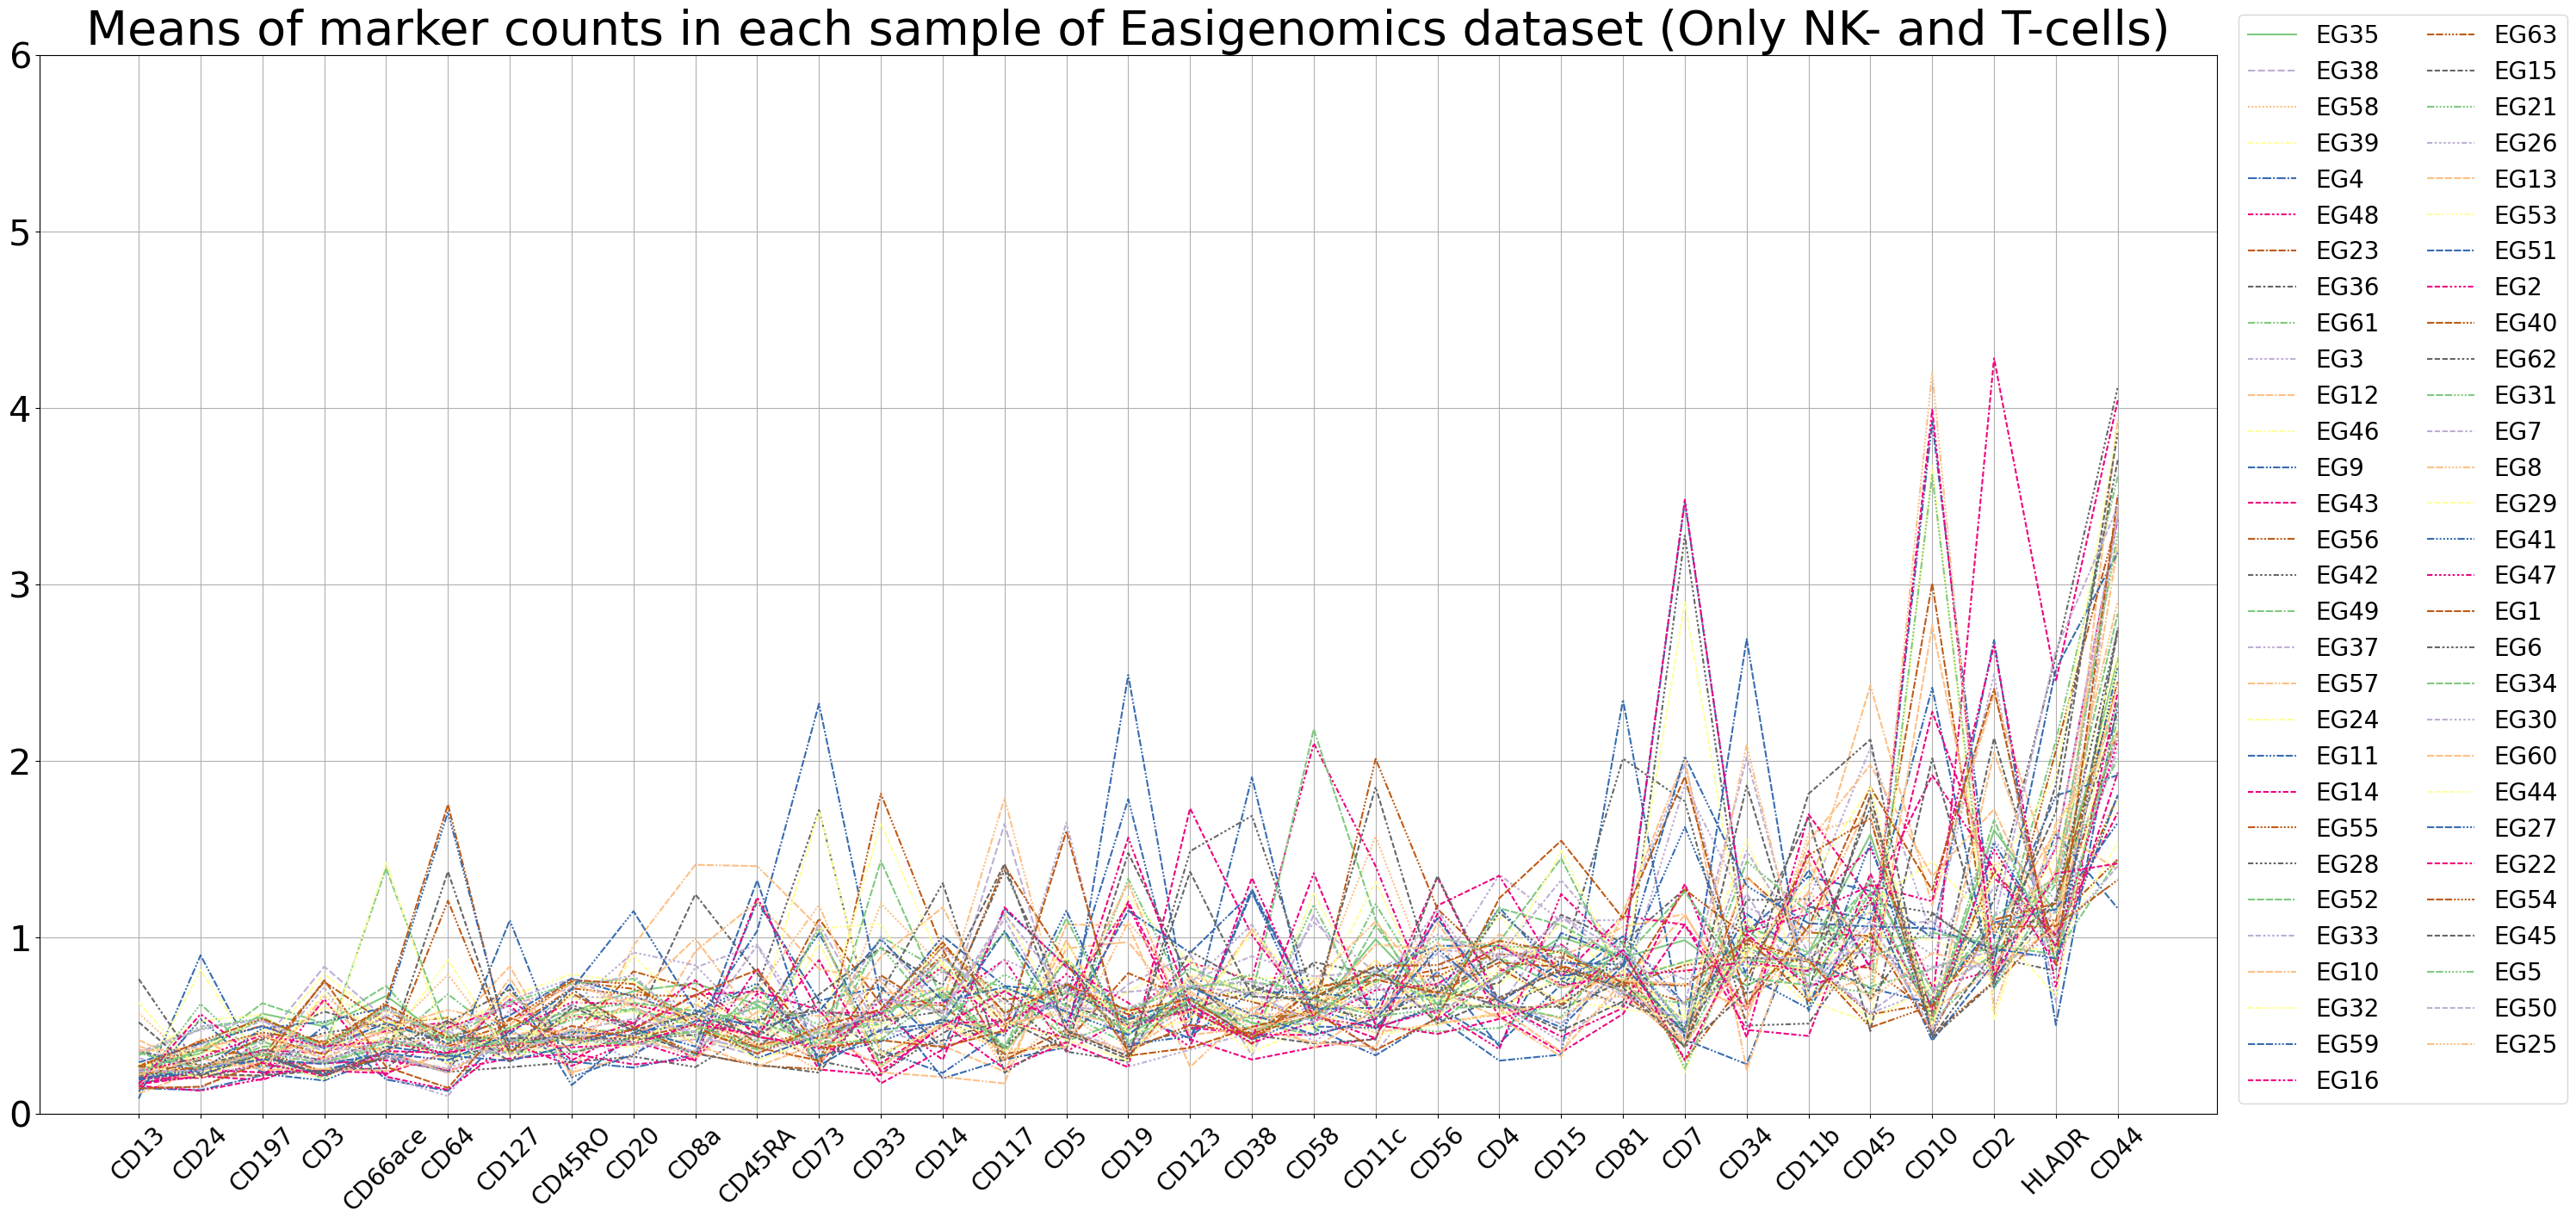

In [135]:
#only NK- and T-cells selected from each sample

palette = sns.color_palette("Accent")

plt.figure(figsize=[30,15])
ax = sns.lineplot(data=df_sorted, palette=palette)
ax.legend(loc=(1.01, 0.01), ncol=2, fontsize = 20)
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=30)
plt.grid()
plt.ylim(0, 6)
plt.title("Means of marker counts in each sample of Easigenomics dataset (Only NK- and T-cells)", fontsize=40) ;

plt.tight_layout()

## Seurat

In [137]:
#Only one sample in dataset

samples_s=adata_seurat.obs['POOL'].unique().tolist()

samples_s

['Seurat']

In [145]:
#save means of protein counts/each protein/each sample into a list

list_samples_s= []

for sample in samples_s:
    eg=adata_seurat[adata_seurat.obs['new_cell_type'] == 'T']
    eg=adata_seurat[adata_seurat.obs['POOL'] == sample]
    prot=eg.obsm['protein_expression_clr_seurat']
    prot_mean=prot.mean(axis=0).sort_values()
    list_samples_s.append(prot_mean)

list_samples_s

[CD86     0.000000
 CD71     0.000000
 CD22     0.000000
 CD45     0.000000
 CD18     0.000000
            ...   
 CD11c    0.891831
 CD14     0.892399
 CD3      0.923868
 CD4      0.988902
 CD8      1.004051
 Length: 141, dtype: float64]

In [146]:
#save column names
proteins=adata_seurat.obsm['protein_expression_clr_seurat'].columns



In [147]:
#creating a dataframe from list of lists

df_s= pd.DataFrame(list_samples_s, columns = proteins)

df_s

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  CD154  CD52  ...  \
0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   

   CD101  CD88  CD224     CD197      CD34  CD10  CD90  CD15  CD117  CD66ace  
0    0.0   0.0    0.0  0.700643  0.742467   0.0   0.0   0.0    0.0      0.0  

[1 rows x 141 columns]

In [148]:
df_s=df_s.T


0
CD86     0.0
CD274    0.0
CD270    0.0
CD155    0.0
CD112    0.0
...      ...
CD10     0.0
CD90     0.0
CD15     0.0
CD117    0.0
CD66ace  0.0

[141 rows x 1 columns]

In [149]:
#add column names

df_s.columns=samples_s


Seurat
CD86        0.0
CD274       0.0
CD270       0.0
CD155       0.0
CD112       0.0
...         ...
CD10        0.0
CD90        0.0
CD15        0.0
CD117       0.0
CD66ace     0.0

[141 rows x 1 columns]

In [150]:
df_s=df_s.T

In [151]:
#remove columns that contain only zeros

df_s = pd.DataFrame(df_s)
df_s != 0
(df_s != 0).any(axis=0)
df_s.loc[:, (df_s != 0).any(axis=0)]
df_s = df_s.loc[:, (df_s != 0).any(axis=0)]

df_s

CD3       CD8      CD56      CD19     CD11c    CD45RA     CD123  \
Seurat  0.923868  1.004051  0.685785  0.823472  0.891831  0.851121  0.796022   

             CD4      CD14      CD16  ...    HLA-DR      CD57     CD278  \
Seurat  0.988902  0.892399  0.776954  ...  0.823718  0.715582  0.762652   

           CD11a     CD79b      CD28      CD38     CD127     CD197      CD34  
Seurat  0.793614  0.705012  0.784389  0.857191  0.830743  0.700643  0.742467  

[1 rows x 25 columns]

In [152]:
#sorting by mean

index_sort = df_s.mean().sort_values().index
df_sorted_s = df_s[index_sort]

df_sorted_s

CD25      CD56     CD197     CD79b      CD57     CD161      CD34  \
Seurat  0.671071  0.685785  0.700643  0.705012  0.715582  0.739996  0.742467   

           CD278      CD16      CD69  ...    HLA-DR     CD127    CD45RA  \
Seurat  0.762652  0.776954  0.784284  ...  0.823718  0.830743  0.851121   

            CD27      CD38     CD11c      CD14       CD3       CD4       CD8  
Seurat  0.855648  0.857191  0.891831  0.892399  0.923868  0.988902  1.004051  

[1 rows x 25 columns]

In [153]:
df_sorted_s=df_sorted_s.T

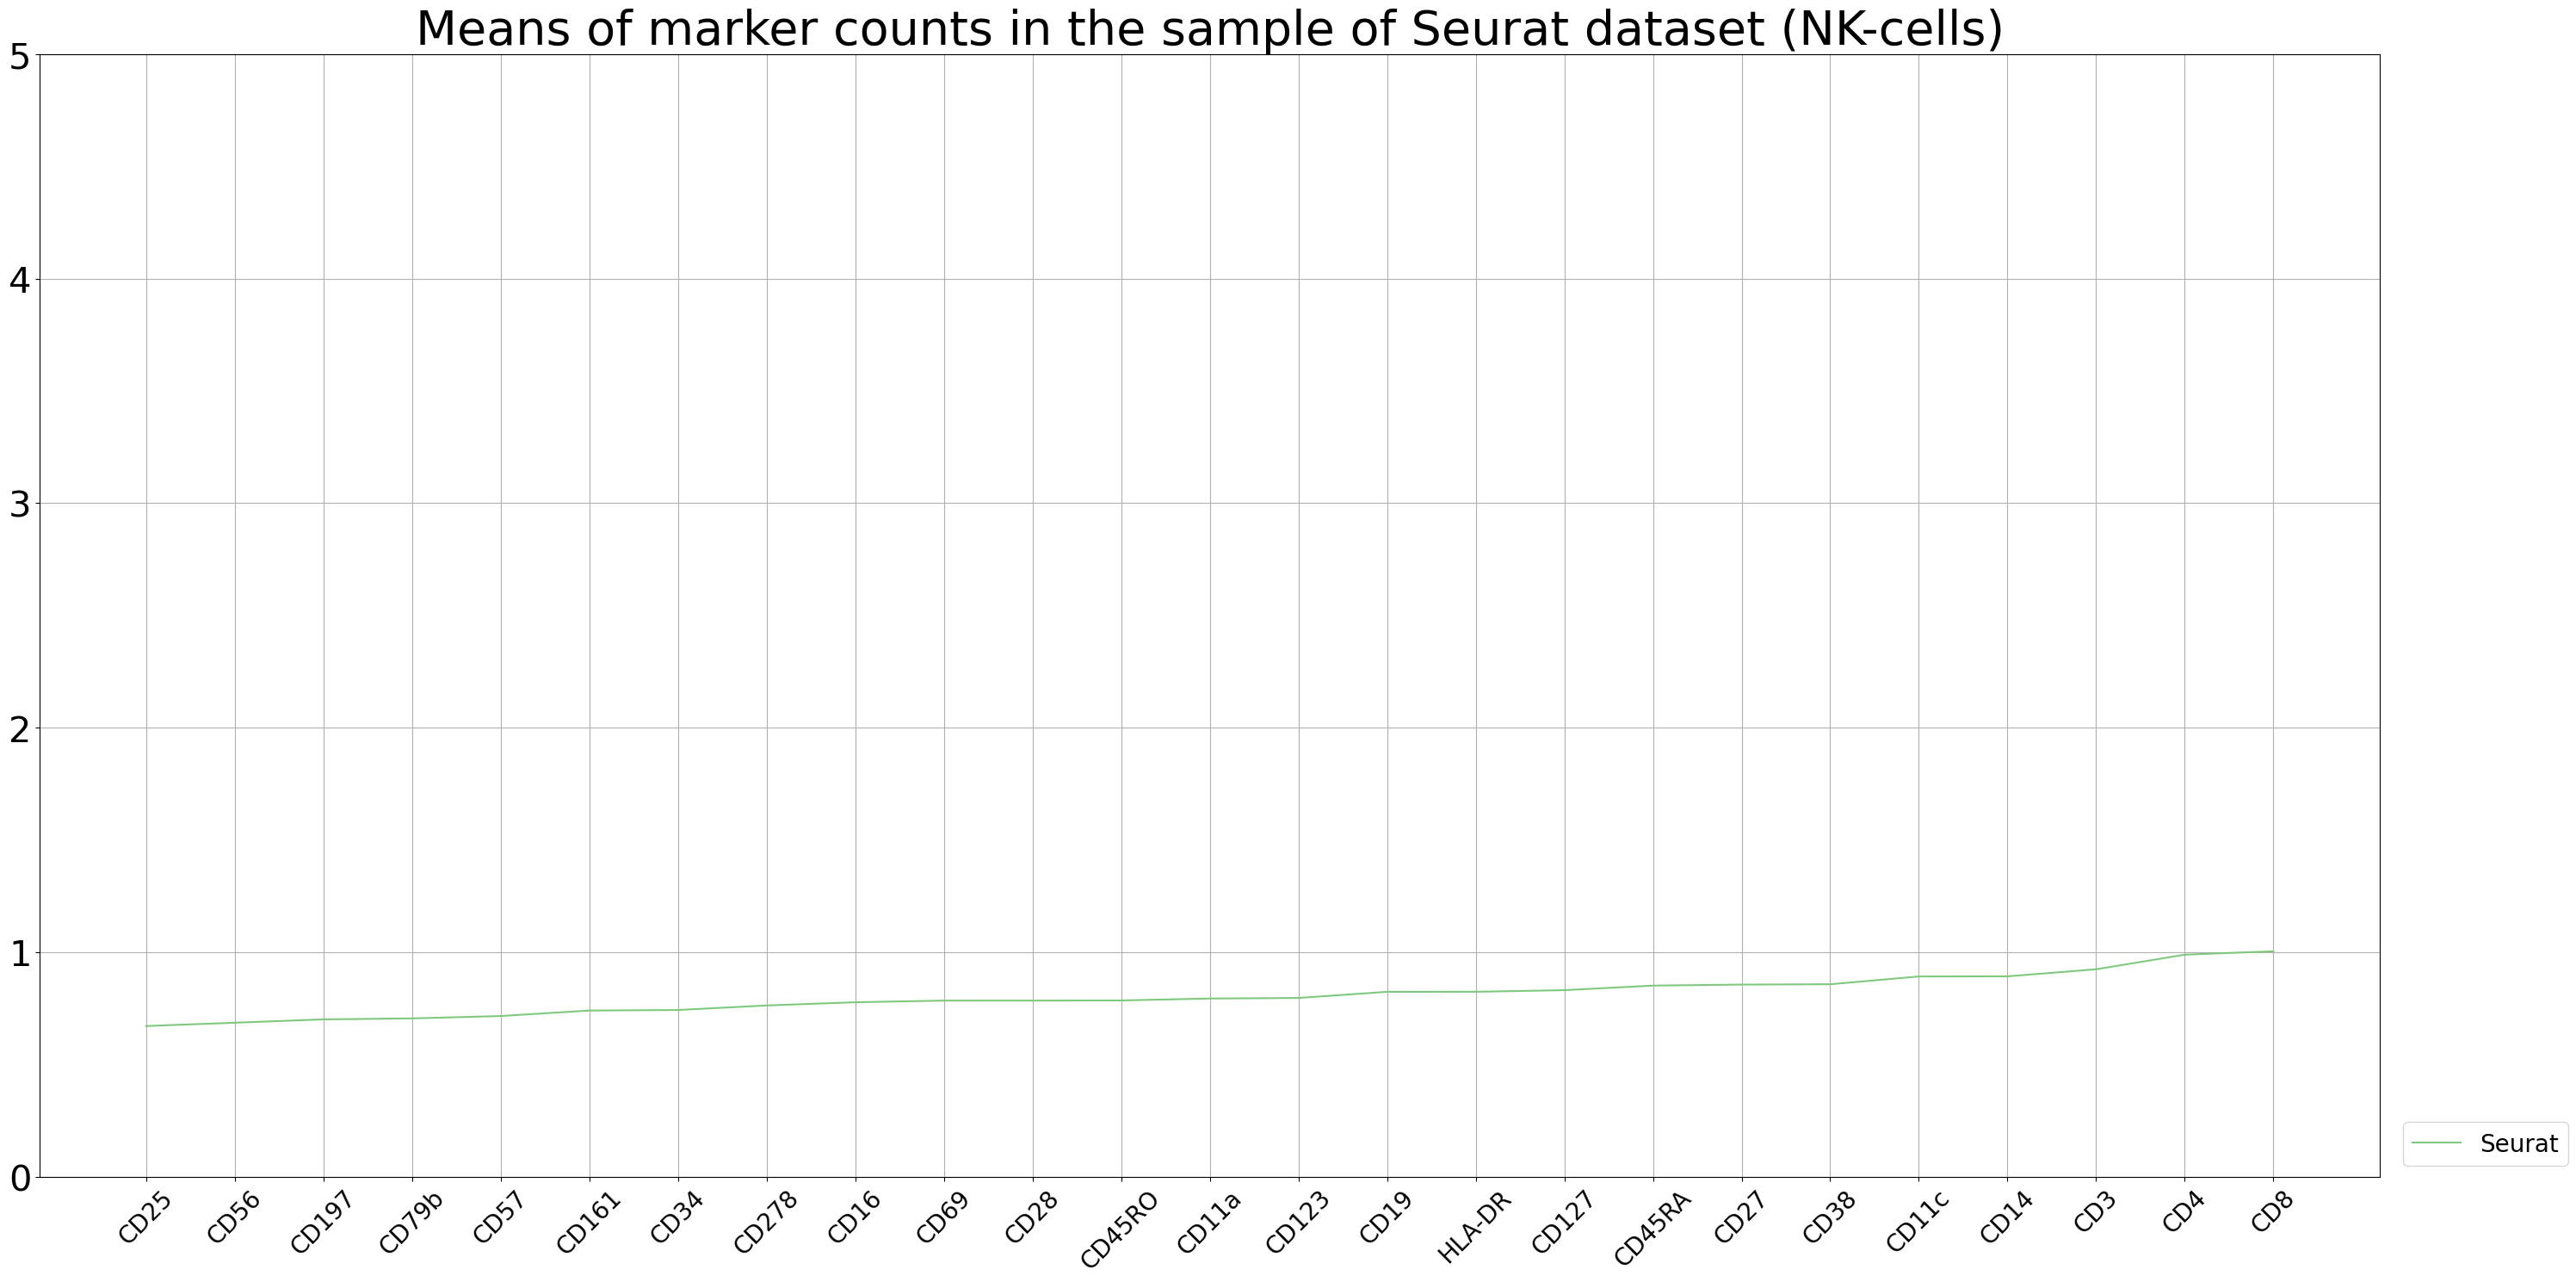

In [155]:
#only NK-cells selected from each sample, raw protein counts

palette = sns.color_palette("Accent")

plt.figure(figsize=[30,15])
ax = sns.lineplot(data=df_sorted_s, palette=palette)
ax.legend(loc=(1.01, 0.01), ncol=2, fontsize = 20, facecolor='white')
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=30)
plt.grid()
plt.ylim(0, 5)
plt.title("Means of marker counts in the sample of Seurat dataset (NK-cells)", fontsize=40) ;

plt.tight_layout()